In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.1
Pandas Version 1.2.4
Seaborn Version 0.11.2
Matplotlib Version 3.2.2


# Problem Statement

### Reading and checking the dataset

In [3]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")

In [4]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


#### Shape of dataset

In [6]:
df.shape

(11260, 19)

In [7]:
df.size

213940

#### Checking for the Information of the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

##### Observations:

### Descriptive Satistics

In [9]:
df.drop('AccountID', axis=1).describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


In [10]:
df.drop('AccountID', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.0,1.0,1.0


### Checking for Duplicates

In [11]:
df.duplicated().sum()

0

### Checking for Null Values

In [12]:
# Null value check for every cloumn

df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

##### Observations:

In [13]:
## Proportion of nulls in predictors out of total size of the predictor dataset expressed as percentage
df_predictor = df.drop(['AccountID','Churn'],axis=1)
round(((df_predictor.isnull().sum().sum()/ df_predictor.size) * 100),2)

1.4

In [14]:
df_predictor_temp = df_predictor[df_predictor.isnull().sum(axis = 1) >= 3]
df_predictor_temp

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [15]:
df_predictor_temp = df_predictor[df_predictor.isnull().sum(axis = 1) == 2]
df_predictor_temp.shape

(121, 17)

##### Observations:

In [16]:
# check for precentage nulls by column

round((df_predictor.isnull().sum().sort_values(ascending = False)/df_predictor.index.size ) *100, 2)

cashback                   4.18
Day_Since_CC_connect       3.17
Complain_ly                3.17
Login_device               1.96
Marital_Status             1.88
CC_Agent_Score             1.03
Account_user_count         0.99
City_Tier                  0.99
Payment                    0.97
Gender                     0.96
rev_per_month              0.91
CC_Contacted_LY            0.91
Tenure                     0.91
Service_Score              0.87
account_segment            0.86
rev_growth_yoy             0.00
coupon_used_for_payment    0.00
dtype: float64

##### Observations:

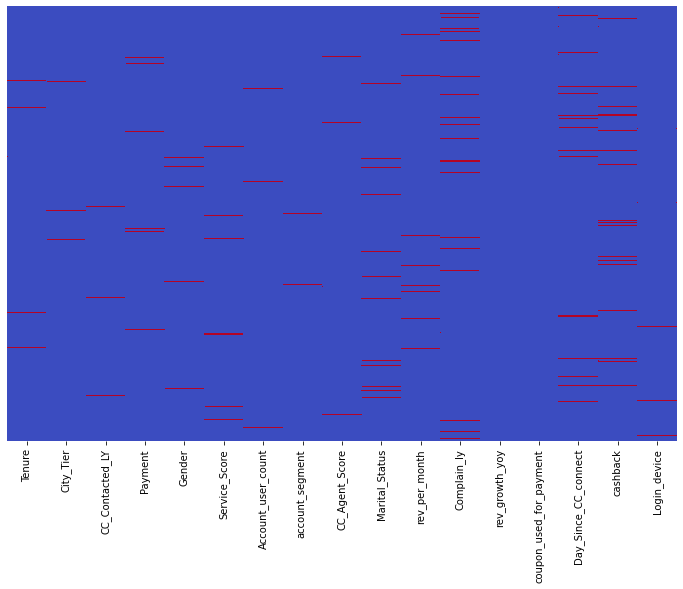

In [17]:
# Missing Values Visualization

plt.figure(figsize = (12,8))
sns.heatmap(df_predictor.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

### Data Clean Up

In [18]:
# Tenure field

df.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
27     131
99     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

In [19]:
##Replacing # in tenure with nulls.

df['Tenure'] = df['Tenure'].replace('#',np.nan)

In [20]:
df.Tenure.value_counts(dropna=False)

1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
4.0      403
5.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
NaN      218
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
30.0     137
28.0     137
99.0     131
27.0     131
26.0     122
29.0     114
25.0     114
31.0      96
61.0       2
51.0       2
50.0       2
60.0       2
Name: Tenure, dtype: int64

In [21]:
# City_Tier column

df.City_Tier.value_counts(dropna = False)# No data cleanup needed except null imputation.

1.0    7263
3.0    3405
2.0     480
NaN     112
Name: City_Tier, dtype: int64

In [22]:
# CC_Contacted_LY column

df.CC_Contacted_LY.value_counts(dropna = False)# No data cleanup needed except null imputation.

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
NaN      102
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
132.0      1
129.0      1
126.0      1
127.0      1
4.0        1
Name: CC_Contacted_LY, dtype: int64

In [23]:
# Payment column

df.Payment.value_counts(dropna = False)# No data cleanup needed except null imputation.

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
NaN                  109
Name: Payment, dtype: int64

In [24]:
# Gender column

df.Gender.value_counts(dropna = False)

Male      6328
Female    4178
M          376
F          270
NaN        108
Name: Gender, dtype: int64

In [25]:
df['Gender'] = df['Gender'].replace('M','Male')

In [26]:
df['Gender'] = df['Gender'].replace('F','Female')

In [27]:
df.Gender.value_counts(dropna = False)

Male      6704
Female    4448
NaN        108
Name: Gender, dtype: int64

In [28]:
# Service_Score column

df.Service_Score.value_counts(dropna = False)# No data cleanup needed except null imputation.

3.0    5490
2.0    3251
4.0    2331
NaN      98
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [29]:
# Account_user_count column

df.Account_user_count.value_counts(dropna = False)# Data clean up required to remove @                             

4      4569
3      3261
5      1699
2       526
1       446
@       332
6       315
NaN     112
Name: Account_user_count, dtype: int64

In [30]:
df['Account_user_count'] = df['Account_user_count'].replace('@',np.nan)

In [31]:
df.Account_user_count.value_counts(dropna = False)

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
NaN     444
6.0     315
Name: Account_user_count, dtype: int64

In [32]:
# account_segment column

df.account_segment.value_counts(dropna = False)

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
NaN               97
Super +           47
Name: account_segment, dtype: int64

In [33]:
df['account_segment'] = df['account_segment'].replace( {'Regular +':'Regular_Plus', 'Super +':'Super_Plus', 'Super Plus':'Super_Plus', 'Regular Plus':'Regular_Plus'} )
## Hyphenating the field values as it will become column names when one hot encoded

In [34]:
df.account_segment.value_counts(dropna = False)

Regular_Plus    4124
Super           4062
HNI             1639
Super_Plus       818
Regular          520
NaN               97
Name: account_segment, dtype: int64

In [35]:
# CC_Agent_Score column

df.CC_Agent_Score.value_counts(dropna = False)# No data cleanup needed except null value imputation.

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
NaN     116
Name: CC_Agent_Score, dtype: int64

In [36]:
# Marital_Status column

df.Marital_Status.value_counts(dropna = False)# No data cleanup needed except null value imputation.

Married     5860
Single      3520
Divorced    1668
NaN          212
Name: Marital_Status, dtype: int64

In [37]:
# rev_per_month column

df.rev_per_month.value_counts(dropna = False)## Clean up required; + needs to be removed

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
NaN     102
13       93
14       48
15       24
102       8
124       5
123       5
107       5
136       4
133       4
129       4
118       4
140       4
137       3
130       3
127       3
115       3
126       3
119       3
138       3
116       3
117       3
101       3
110       3
108       3
113       3
125       2
19        2
139       2
22        2
134       2
131       2
114       2
105       2
121       2
120       2
103       1
104       1
100       1
25        1
23        1
122       1
135       1
21        1
20        1
111       1
109       1
Name: rev_per_month, dtype: int64

In [38]:
df['rev_per_month'] = df['rev_per_month'].replace('+',np.nan)

In [39]:
df.rev_per_month.value_counts()

3.0      1746
2.0      1585
5.0      1337
4.0      1218
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
123.0       5
107.0       5
124.0       5
136.0       4
140.0       4
129.0       4
118.0       4
133.0       4
110.0       3
127.0       3
108.0       3
101.0       3
117.0       3
116.0       3
138.0       3
126.0       3
119.0       3
115.0       3
137.0       3
130.0       3
113.0       3
125.0       2
19.0        2
105.0       2
134.0       2
121.0       2
22.0        2
114.0       2
139.0       2
131.0       2
120.0       2
109.0       1
20.0        1
100.0       1
111.0       1
25.0        1
135.0       1
103.0       1
122.0       1
21.0        1
104.0       1
23.0        1
Name: rev_per_month, dtype: int64

In [40]:
# Complain_ly column

df.Complain_ly.value_counts(dropna = False)# No data cleanup needed except null value imputation.

0.0    7792
1.0    3111
NaN     357
Name: Complain_ly, dtype: int64

In [41]:
# rev_growth_yoy column

df.rev_growth_yoy.value_counts(dropna = False)## Clean up required; $ needs to be removed

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
$        3
Name: rev_growth_yoy, dtype: int64

In [42]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.nan)

In [43]:
df.rev_growth_yoy.value_counts(dropna = False)

14.0    1524
13.0    1427
15.0    1283
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
NaN        3
Name: rev_growth_yoy, dtype: int64

In [44]:
# coupon_used_for_payment column

df.coupon_used_for_payment.value_counts(dropna = False)# data clean up required for #, * and $

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
$        1
*        1
#        1
Name: coupon_used_for_payment, dtype: int64

In [45]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace( {'#': np.nan, '*': np.nan, '$': np.nan} )

In [46]:
df.coupon_used_for_payment.value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

In [47]:
# Day_Since_CC_connect column

df.Day_Since_CC_connect.value_counts(dropna = False)# data clean up required for $

3      1816
2      1574
1      1256
8      1169
0       964
7       911
4       893
9       622
5       479
NaN     357
10      339
6       229
11      183
12      146
13      117
14       74
15       37
17       34
16       26
18       26
30        2
31        2
47        2
46        1
$         1
Name: Day_Since_CC_connect, dtype: int64

In [48]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.nan)

In [49]:
df.Day_Since_CC_connect.value_counts(dropna = False)

3.0     1816
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
NaN      358
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
18.0      26
16.0      26
31.0       2
47.0       2
30.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [50]:
df.cashback.value_counts(dropna = False)

NaN       471
155.62     10
152.28      9
145.08      9
154.73      9
         ... 
193.92      1
118.61      1
244.18      1
232.20      1
125.41      1
Name: cashback, Length: 5694, dtype: int64

In [51]:
df[df['cashback']=='$']## data clean up required for $

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,20440,0,0.0,1.0,16.0,Credit Card,Male,3.0,2.0,Regular_Plus,3.0,Single,2.0,0.0,18.0,1.0,2.0,$,Mobile
1257,21257,0,4.0,1.0,9.0,Credit Card,Male,2.0,3.0,Regular_Plus,5.0,Married,NaN,NaN,13.0,0.0,3.0,$,Computer


In [52]:
df['cashback'] = df['cashback'].replace('$', np.nan)

In [53]:
df[df['cashback']=='$']

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [54]:
df.Login_device.value_counts(dropna = False)

Mobile      7482
Computer    3018
&&&&         539
NaN          221
Name: Login_device, dtype: int64

In [55]:
df['Login_device'] = df['Login_device'].replace('&&&&',np.nan)# data clean up required for &&&&

In [56]:
df.Login_device.value_counts(dropna = False)

Mobile      7482
Computer    3018
NaN          760
Name: Login_device, dtype: int64

In [57]:
# Descriptive statistics after data cleanup

df.drop("AccountID", axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0
rev_growth_yoy,11257.0,16.193391,3.757721,4.0,13.00,15.00,19.00,28.0


#### Null check after data clean up

In [58]:
df_predictor = df.drop(['AccountID','Churn'],axis=1)

print("\nTotal number of nulls in all predictor fields ")
print(df_predictor.isnull().sum().sum())

print("\nTotal % nulls in all predictor fields ")
print(round(((df_predictor.isnull().sum().sum()/ df_predictor.size) * 100), 2))

# Percentage nulls by column in predictor dataset
print("\n\nThe proportion of nulls by column-multiply by 100 for percentage")
print(df_predictor.isnull().sum().sort_values(ascending = False)/df_predictor.index.size)

# Rows that have more than 4 null fields
print("\n\nRows that have more than 4 null fields")
df_predictor_temp = df_predictor[df_predictor.isnull().sum(axis = 1) >= 4]
df_predictor_temp


Total number of nulls in all predictor fields 
4361

Total % nulls in all predictor fields 
2.28


The proportion of nulls by column-multiply by 100 for percentage
rev_per_month              0.070249
Login_device               0.067496
cashback                   0.042007
Account_user_count         0.039432
Day_Since_CC_connect       0.031794
Complain_ly                0.031705
Tenure                     0.019361
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000266
coupon_used_for_payment    0.000266
dtype: float64


Rows that have more than 4 null fields


,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


##### Observations:

### Outliers check

In [59]:
# Making a separate list for numeric and categorical columns

num_cols = ['Tenure', 'CC_Contacted_LY', 'rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']
cat_cols = ['City_Tier','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device']

In [60]:
# Get upper bound and lower bound
Q1 = df_predictor[num_cols].quantile(0.25)
Q3 = df_predictor[num_cols].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [61]:
print ("Proportion of outliers in numeric continuous columns \n")
(((df_predictor[num_cols] > UL) | (df_predictor[num_cols] < LL)).sum())/ df_predictor.shape[0]

Proportion of outliers in numeric continuous columns 



Tenure                     0.012345
CC_Contacted_LY            0.003730
rev_per_month              0.016430
rev_growth_yoy             0.000000
coupon_used_for_payment    0.122558
Day_Since_CC_connect       0.002931
cashback                   0.078064
dtype: float64

In [62]:
print ("Number of outliers in numeric continuous columns \n")
((df_predictor[num_cols] > UL) | (df_predictor[num_cols] < LL)).sum().sum()

Number of outliers in numeric continuous columns 



2658

In [63]:
print ("Proportion of outliers in all numeric continuous columns \n")
((df_predictor[num_cols] > UL) | (df_predictor[num_cols] < LL)).sum().sum()/(df_predictor.shape[0]*df_predictor.shape[1])

Proportion of outliers in all numeric continuous columns 



0.013885696374464528

##### Observations:

In [64]:
df_predictor.shape

(11260, 17)

## Univariate and multivariate analysis

### Univariate Analysis - continuous variables

#### Box plot for continuous variables

C:\Users\swetha\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


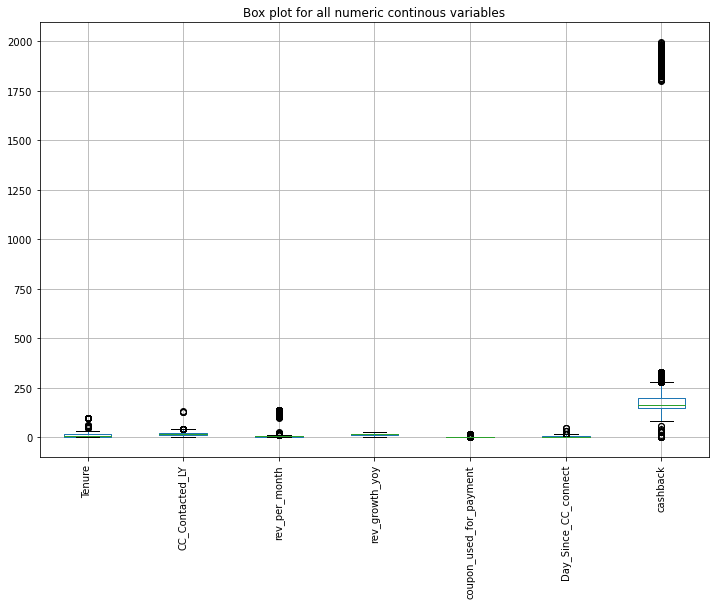

In [65]:
plt.figure(figsize=(12,8))
df_predictor[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Box plot for all numeric continous variables");

Text(0.5, 1.0, 'Box plot for cashback variable')

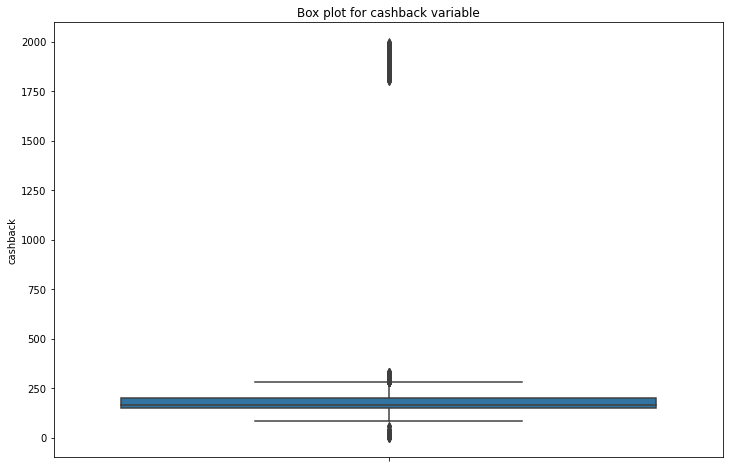

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='cashback')
plt.xticks(rotation=90)
plt.title("Box plot for cashback variable")

C:\Users\swetha\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


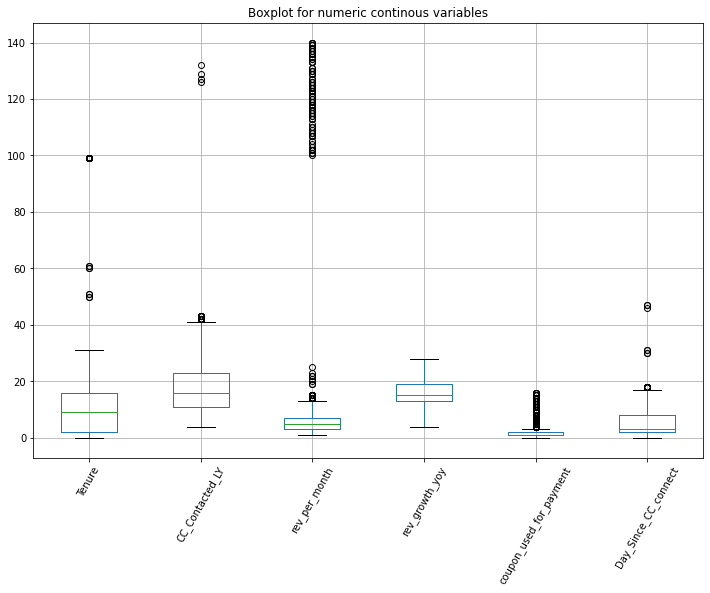

In [67]:
plt.figure(figsize=(12,8))
df_predictor[num_cols].drop('cashback',axis=1).boxplot()
plt.xticks(rotation=60)
plt.title("Boxplot for numeric continous variables");

Tenure                        AxesSubplot(0.125,0.125;0.0945122x0.755)
CC_Contacted_LY            AxesSubplot(0.238415,0.125;0.0945122x0.755)
rev_per_month              AxesSubplot(0.351829,0.125;0.0945122x0.755)
rev_growth_yoy             AxesSubplot(0.465244,0.125;0.0945122x0.755)
coupon_used_for_payment    AxesSubplot(0.578659,0.125;0.0945122x0.755)
Day_Since_CC_connect       AxesSubplot(0.692073,0.125;0.0945122x0.755)
cashback                   AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

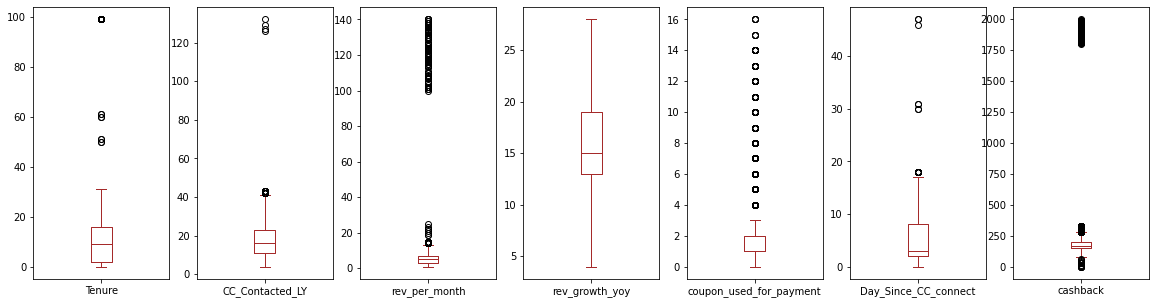

In [68]:
df[num_cols].plot(kind = 'box', subplots = True,
                 figsize = (20,5), color = 'brown')

In [69]:
df['coupon_used_for_payment'].value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

##### Observation:

In [70]:
Outlier_treat_vars = ['Tenure','CC_Contacted_LY','rev_per_month','Day_Since_CC_connect', 'cashback']

#### Histogram for continuous variables

In [71]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


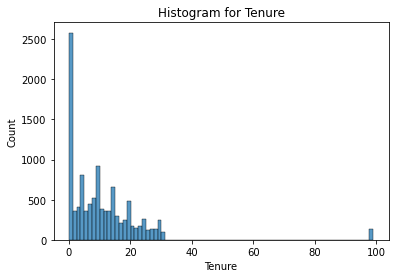

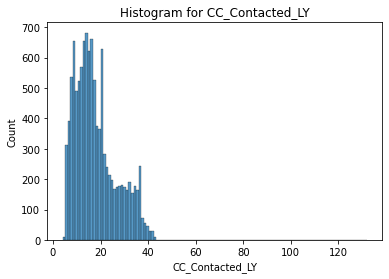

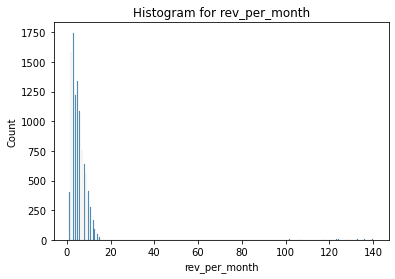

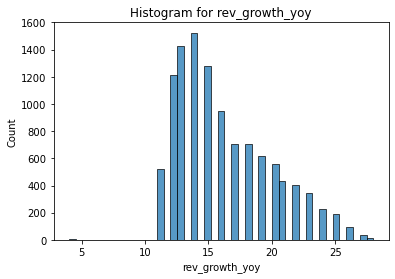

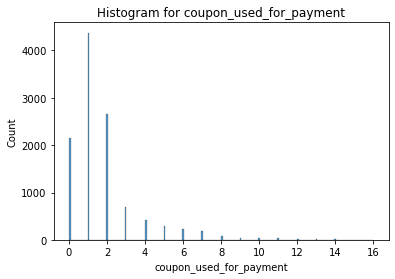

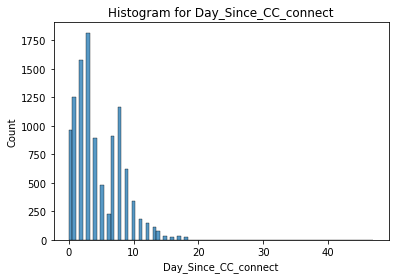

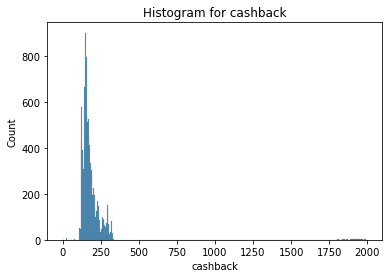

In [72]:
import seaborn as sns

# Using histplot
for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=i)
    plot_title = 'Histogram for ' + i
    plt.title(plot_title)
    plt.show();

In [73]:
cols = ['Skewness']
pd.DataFrame(df[num_cols].skew(skipna=True).round(2), columns=cols)

,Skewness
Tenure,3.90
CC_Contacted_LY,1.42
rev_per_month,9.09
rev_growth_yoy,0.75
coupon_used_for_payment,2.58
Day_Since_CC_connect,1.27
cashback,8.77


## Univariate - Count plot for categorical variables

#### Target variable analysis

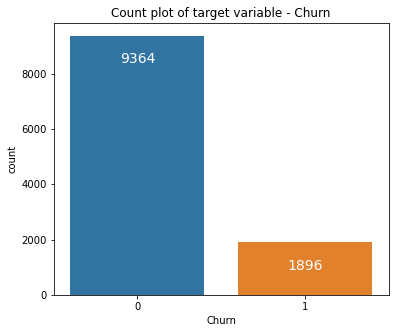

In [74]:
# Count plot of target column

plt.figure(figsize=(6,5))
ax = sns.countplot(x='Churn', data=df)

# To display inside the bar
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
plt.title("Count plot of target variable - Churn");

In [75]:
# Checking for balance of target variable in the dataset

(df['Churn'].value_counts(normalize=True).round(3)) * 100

0    83.2
1    16.8
Name: Churn, dtype: float64

##### Observation:

#### Other categorical variables

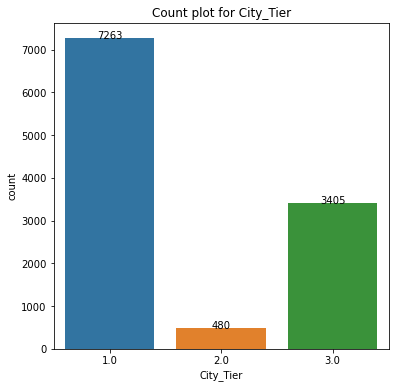

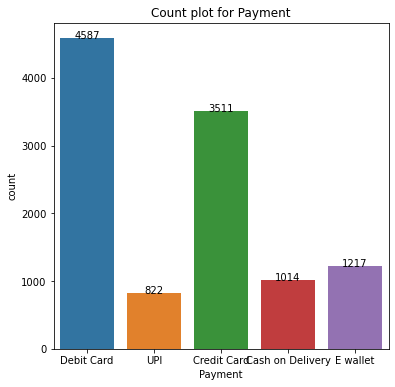

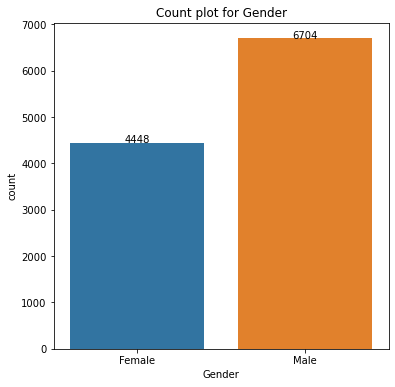

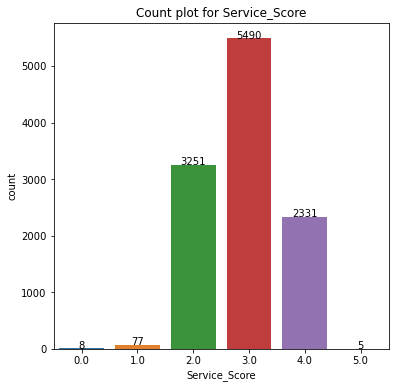

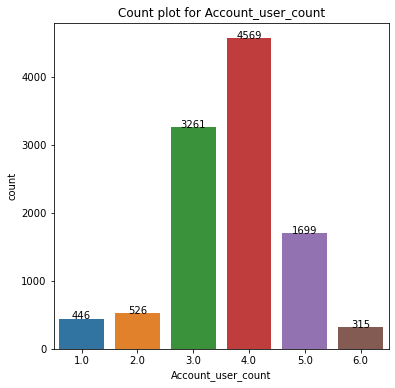

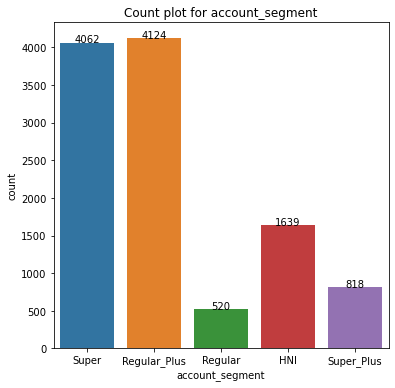

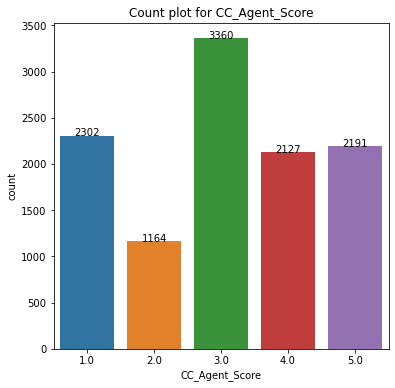

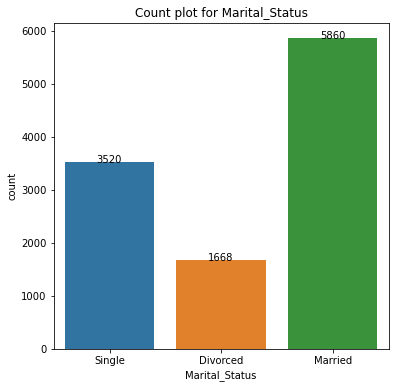

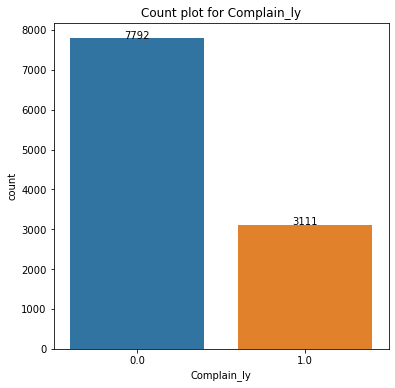

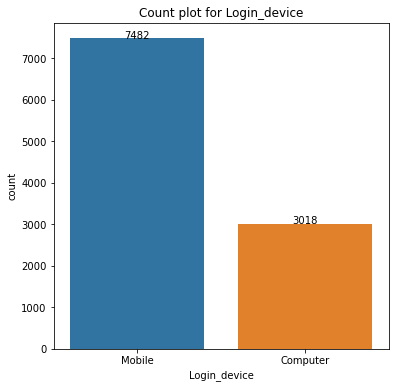

In [76]:
for i in cat_cols:
    plt.figure(figsize=(6,6))
    df[i].value_counts(ascending=False).index
    ax = sns.countplot(x=df[i])

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

    plot_title = 'Count plot for ' + i
    plt.title(plot_title)
    plt.show();

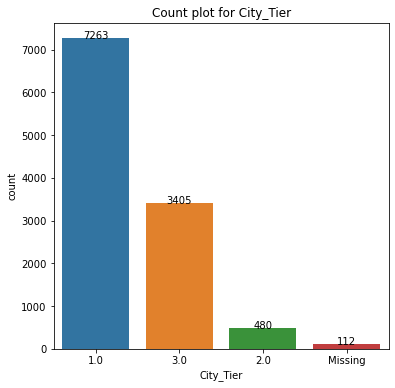

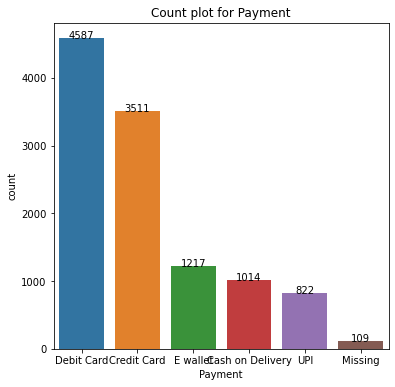

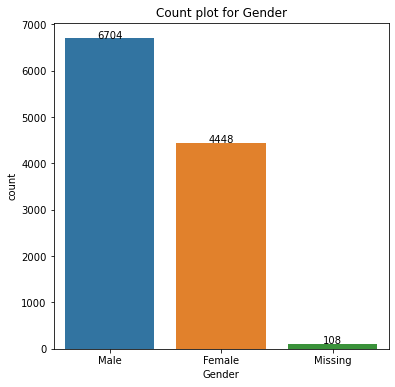

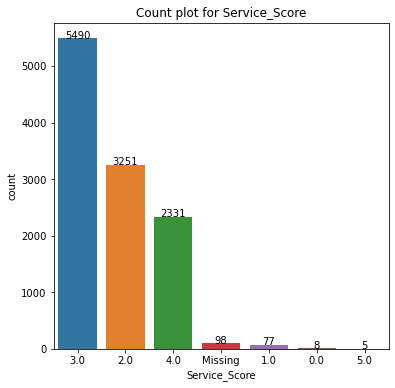

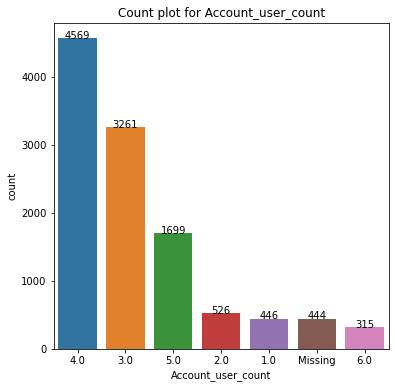

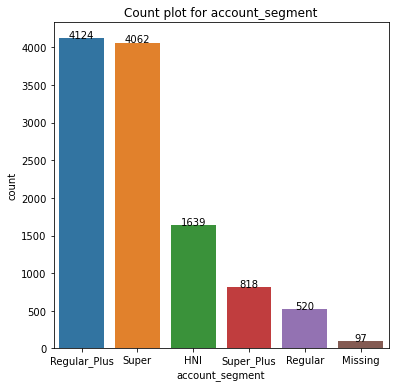

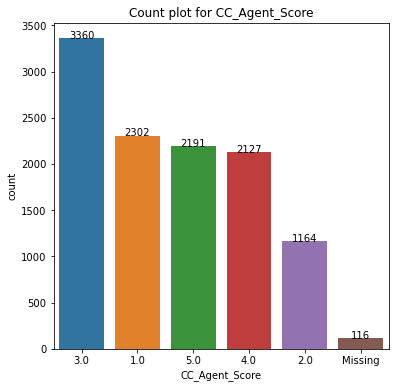

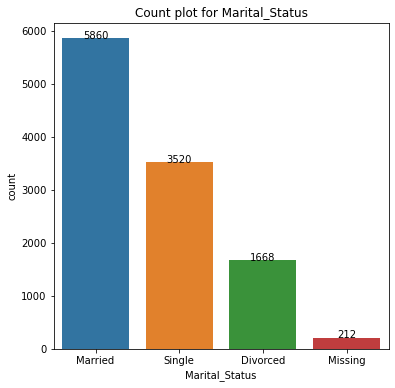

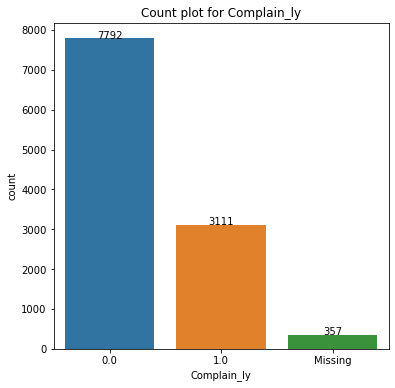

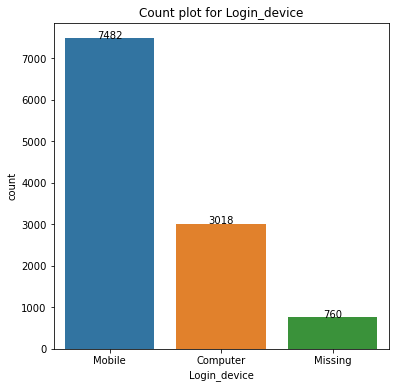

In [77]:
df1 = pd.DataFrame()
for i in cat_cols:
    plt.figure(figsize=(6,6))
    
    df1[i] = df[i].fillna("Missing")
    order = df1[i].value_counts(ascending=False).index
    ax = sns.countplot(x=df1[i],order=order)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

    plot_title = 'Count plot for ' + i
    plt.title(plot_title)
    plt.show();

## Bivariate analysis - Numerical fields vs Churn

#### Histogram and boxplots with hue

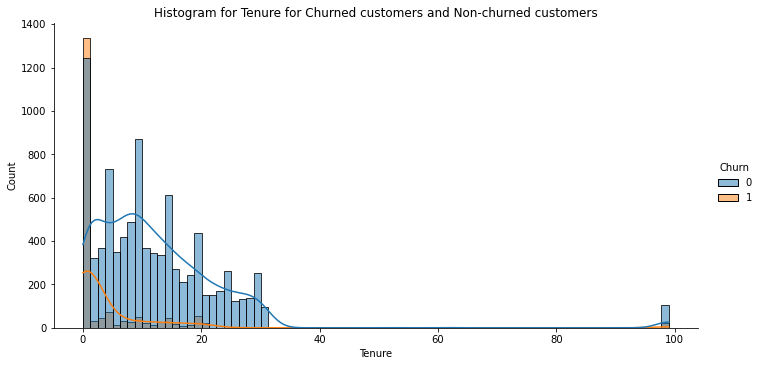

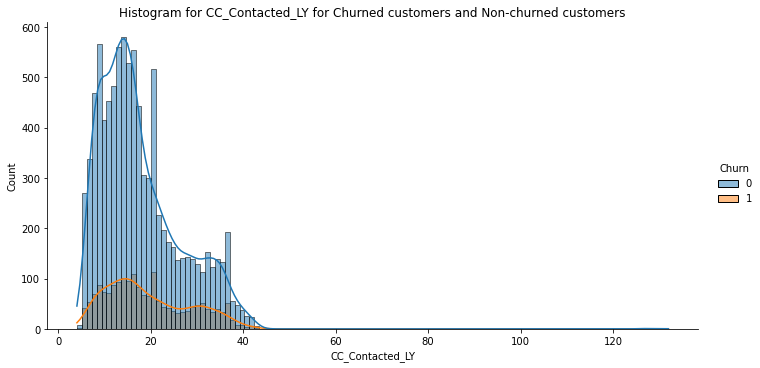

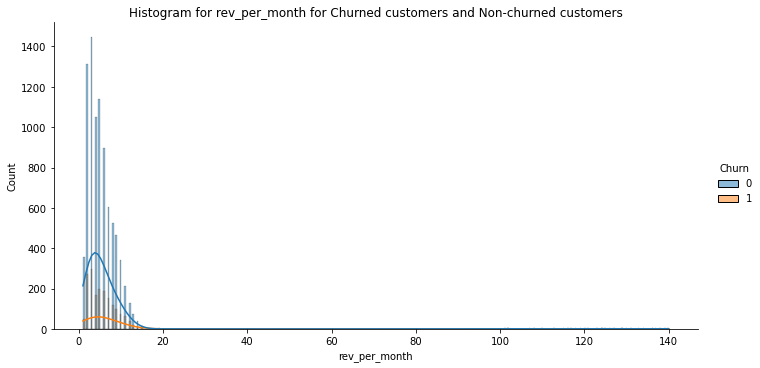

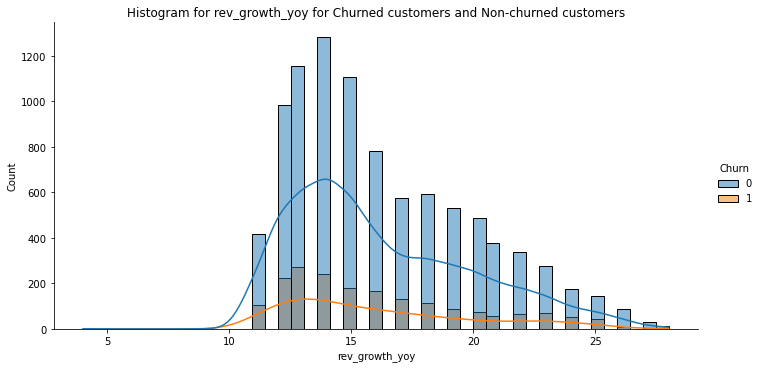

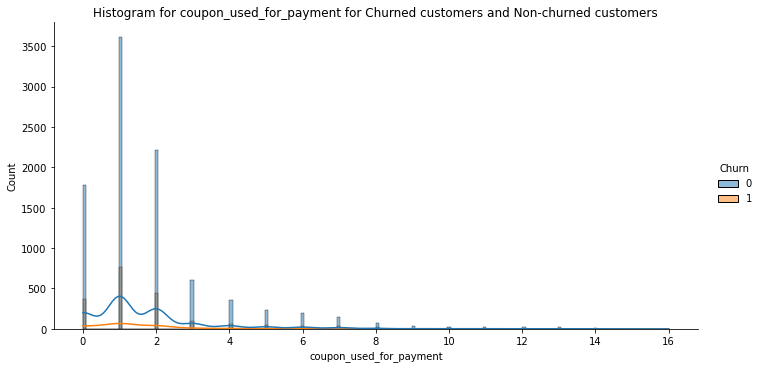

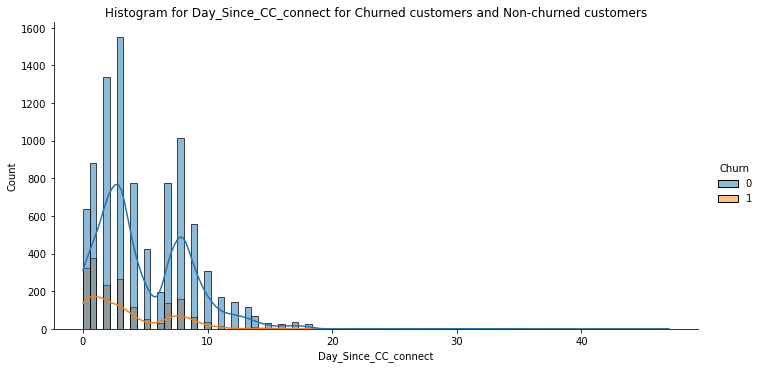

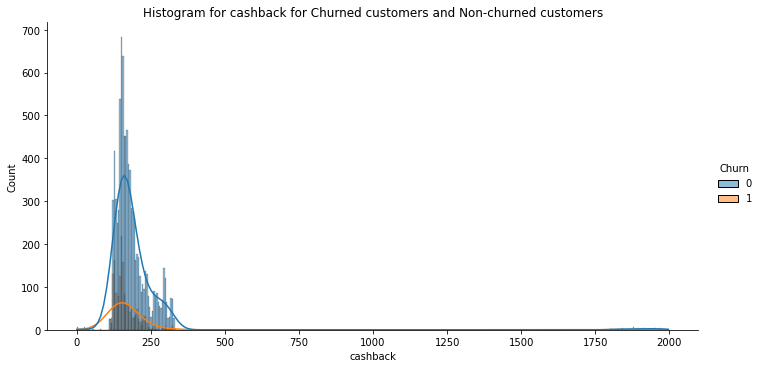

In [78]:
for i in num_cols:
    sns.displot(x=df[i], hue=df['Churn'], kind='hist', kde=True, aspect=2)
    plot_title = "Histogram for " + i + " for Churned customers and Non-churned customers"
    plt.title(plot_title)
    plt.show();

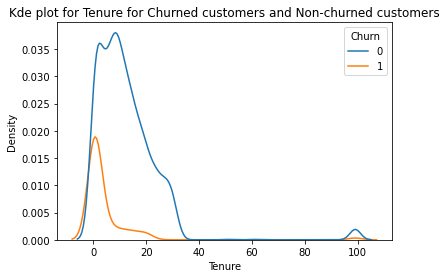

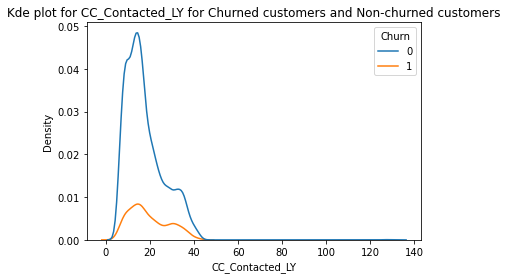

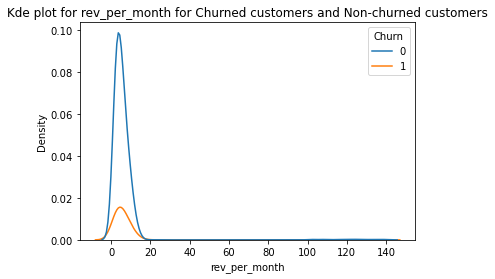

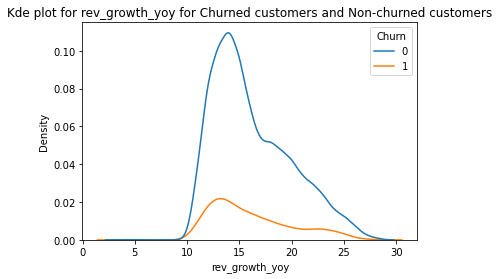

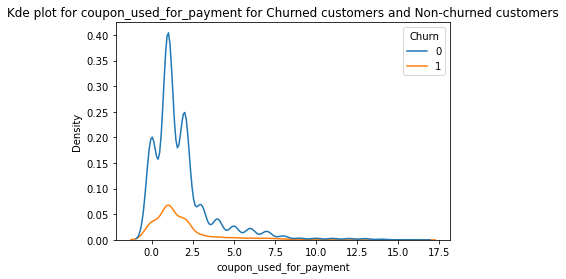

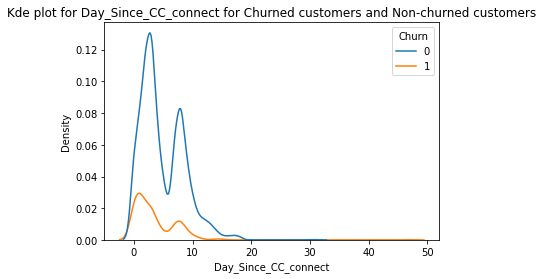

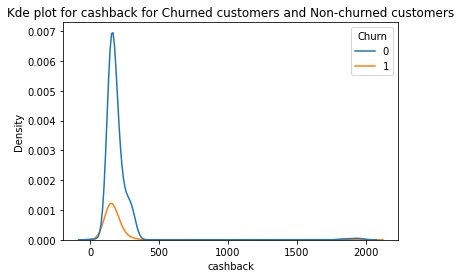

In [79]:
for i in num_cols:
    sns.kdeplot(x=df[i], hue=df['Churn'])
    plot_title = "Kde plot for " + i + " for Churned customers and Non-churned customers"
    plt.title(plot_title)
    plt.show();

In [80]:
#Box plot errors if 0 and 1s are left as-is or datatype converted as object/categorical. Hence converting to string
#Need to convert back after analysis

df['Churn'] = df['Churn'].replace( {1: 'Churned', 0:'Current'} )

In [81]:
df.Churn.value_counts(normalize=True)

Current    0.831616
Churned    0.168384
Name: Churn, dtype: float64

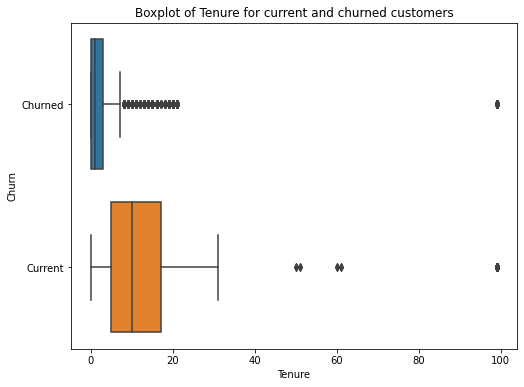

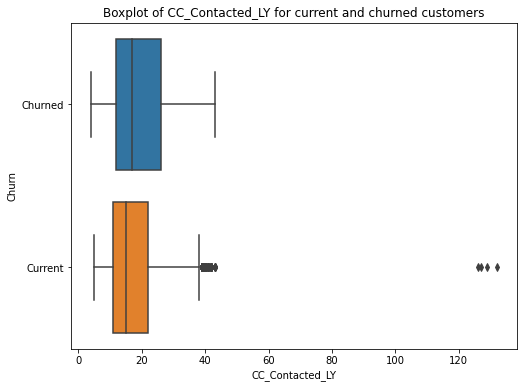

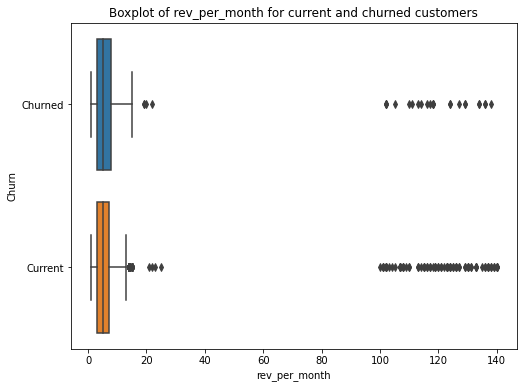

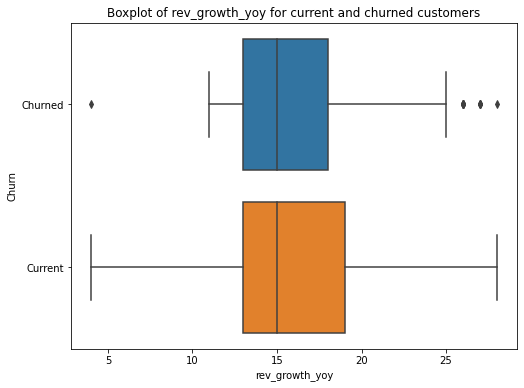

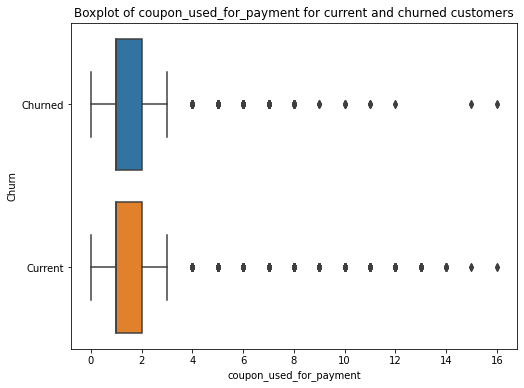

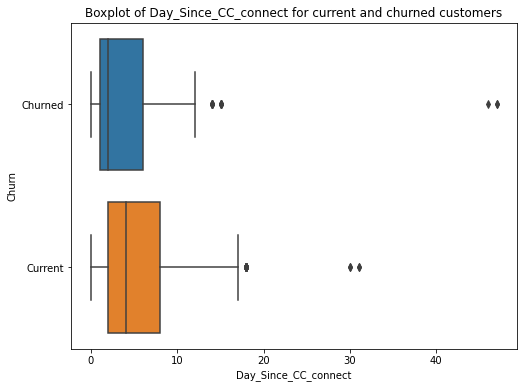

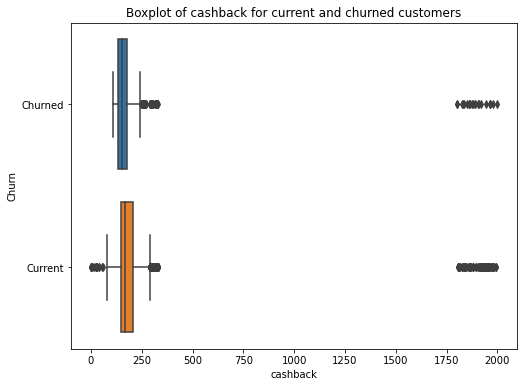

In [82]:
for i in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[i], y=df['Churn'])
    plot_title = 'Boxplot of ' + i + " for current and churned customers"
    plt.title(plot_title)
    plt.show();

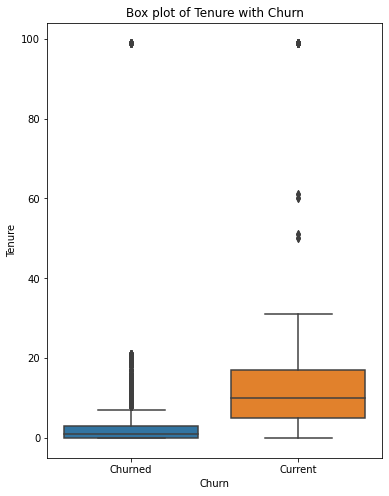

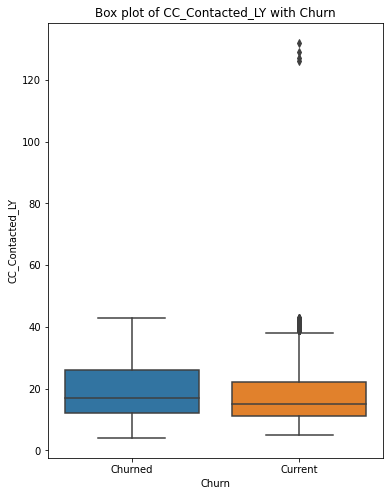

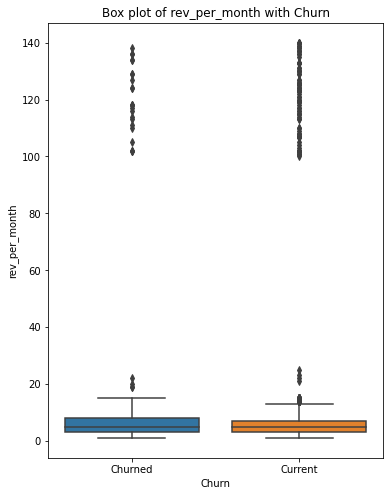

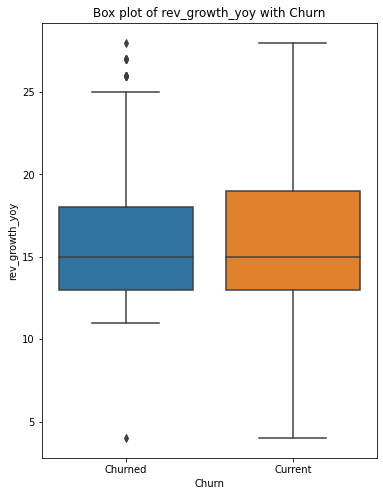

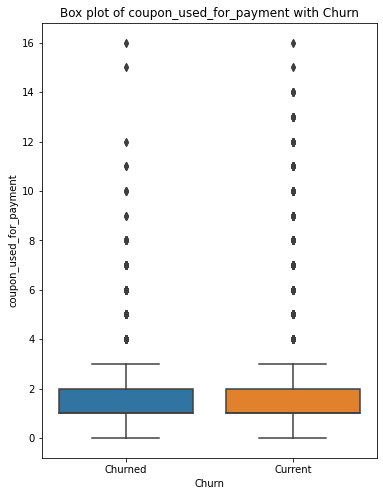

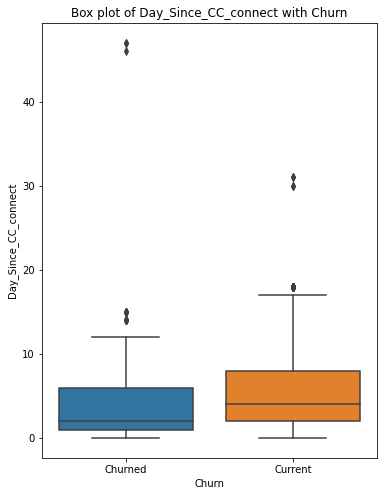

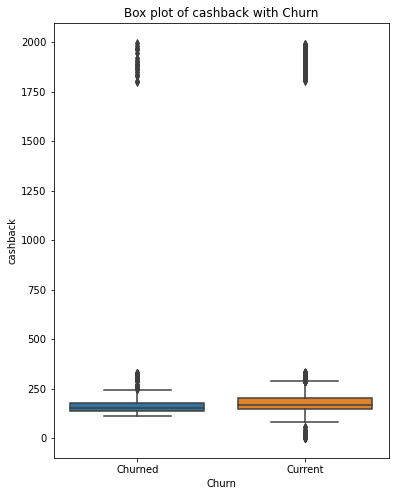

In [83]:
for i in num_cols:
    plt.figure(figsize=(6,8))
    sns.boxplot(data = df, y=i, x='Churn')
    plot_title = "Box plot of "+i+" with Churn"
    plt.title(plot_title)
    plt.show();

#### One-way Anova Hypothesis test for feature selection

In [84]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [85]:
num_cols

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [86]:
## Anova for Churn vs Tenure

formula = 'Tenure ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,9.956283e+04,99562.834286,634.621266,3.320121e-136
Residual,11040.0,1.732015e+06,156.885436,NaN,NaN


In [87]:
## Anova for Churn vs CC_Contacted_LY

formula = 'CC_Contacted_LY ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,4542.363574,4542.363574,58.250189,2.496284e-14
Residual,11156.0,869947.532195,77.980238,NaN,NaN


In [88]:
## Anova for Churn vs rev_per_month

formula = 'rev_per_month ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,7.542129e+02,754.212873,5.319521,0.021107
Residual,10467.0,1.484033e+06,141.782113,NaN,NaN


In [89]:
## Anova for Churn vs rev_growth_yoy

formula = 'rev_growth_yoy ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,30.605488,30.605488,2.16768,0.140967
Residual,11255.0,158909.382786,14.119003,NaN,NaN


In [90]:
## Anova for Churn vs coupon_used_for_payment

formula = 'coupon_used_for_payment ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,9.597780,9.597780,2.474533,0.115732
Residual,11255.0,43653.891604,3.878622,NaN,NaN


In [91]:
## Anova for Churn vs Day_Since_CC_connect

formula = 'Day_Since_CC_connect ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,3262.738668,3262.738668,243.953328,2.097172e-54
Residual,10900.0,145781.374431,13.374438,NaN,NaN


In [92]:
## Anova for Churn vs cashback

formula = 'cashback ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,3.610195e+05,361019.455313,11.321105,0.000769
Residual,10785.0,3.439236e+08,31889.064508,NaN,NaN


##### Observations:

## Bivariate Analysis - Categorical vs Churn

#### Count plots and stacked bar

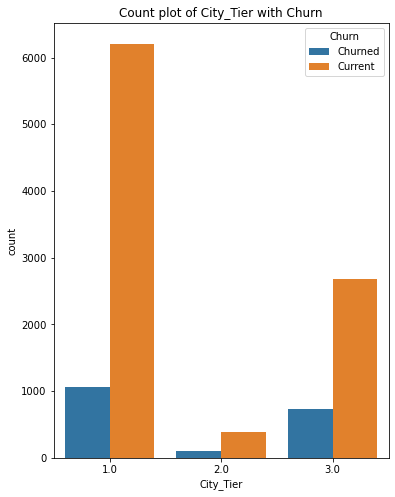

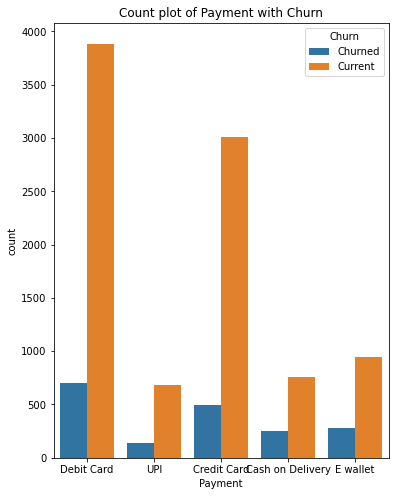

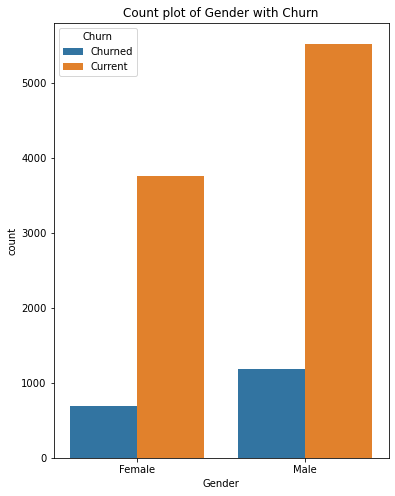

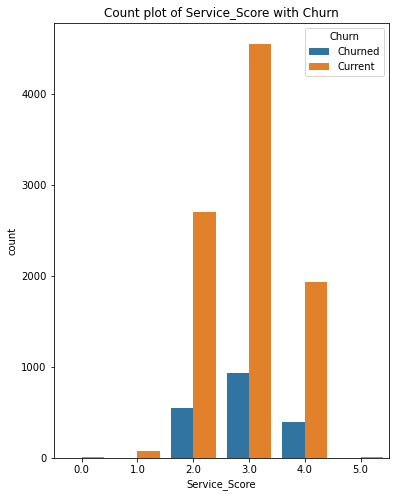

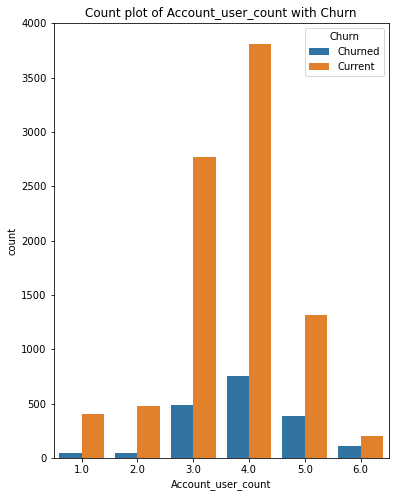

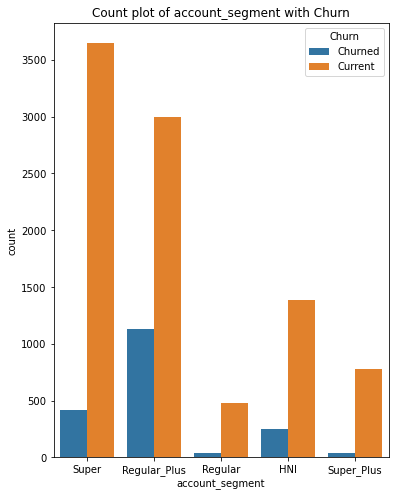

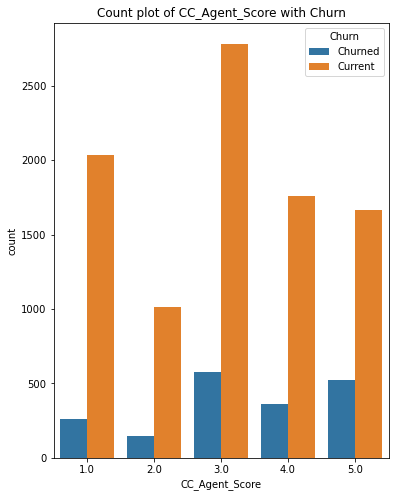

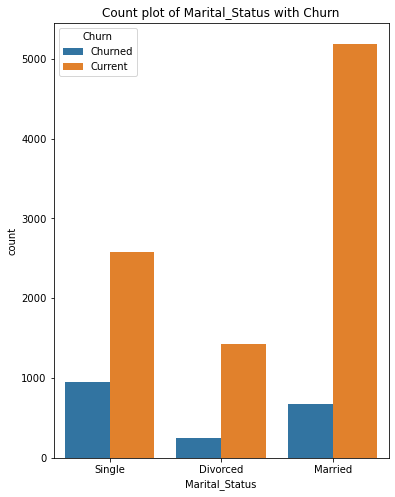

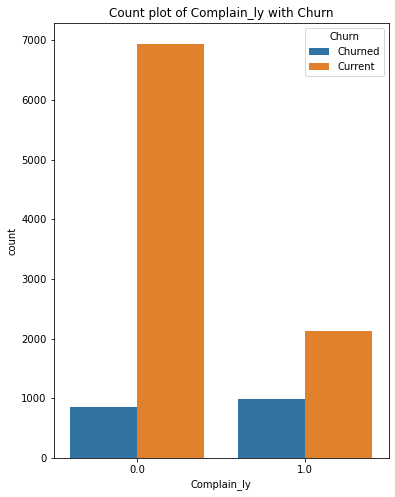

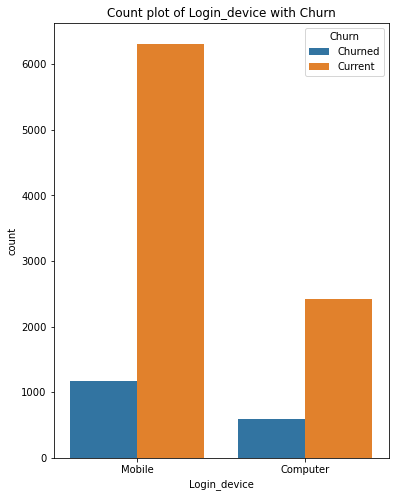

In [93]:
# Countplot with hue

for i in cat_cols:
    plt.figure(figsize=(6,8))
    sns.countplot(data = df, x=i, hue='Churn')
    plot_title = "Count plot of "+i+" with Churn"
    plt.title(plot_title)
    plt.show();

In [94]:
pd.pivot_table(df, values='AccountID', index=['Churn'], columns=['Login_device'], aggfunc='count', margins=True)

Login_device,Computer,Mobile,All
Churn,,,
Churned,597,1172,1769
Current,2421,6310,8731
All,3018,7482,10500


City_Tier       1.0       2.0       3.0
Churn                                  
Churned    0.562001  0.051091  0.386908
Current    0.669652  0.041428  0.288920


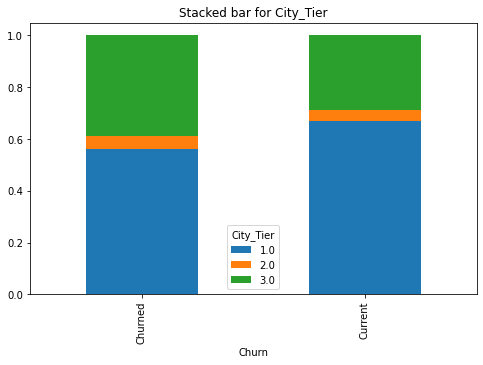

Payment  Cash on Delivery  Credit Card  Debit Card  E wallet       UPI
Churn                                                                 
Churned          0.135539     0.266275    0.374600  0.147279  0.076307
Current          0.081923     0.324674    0.418778  0.101434  0.073192


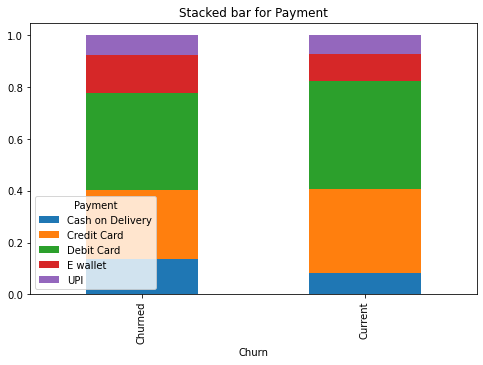

Gender     Female      Male
Churn                      
Churned  0.367663  0.632337
Current  0.405152  0.594848


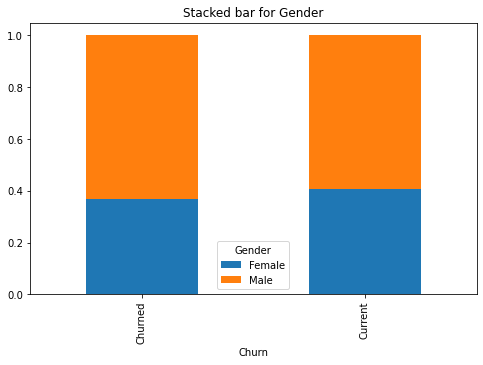

Service_Score       0.0       1.0       2.0       3.0       4.0       5.0
Churn                                                                    
Churned        0.000000  0.000000  0.292553  0.497872  0.209574  0.000000
Current        0.000862  0.008296  0.290993  0.490627  0.208683  0.000539


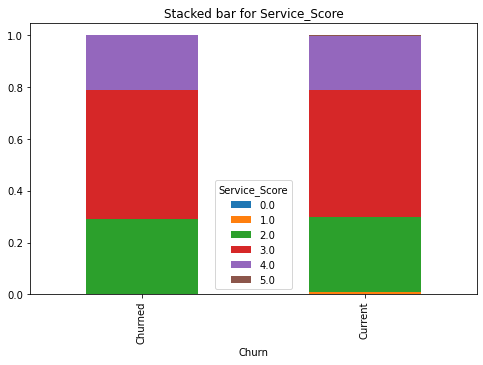

Account_user_count       1.0       2.0       3.0       4.0       5.0       6.0
Churn                                                                         
Churned             0.024044  0.026230  0.267213  0.414208  0.208743  0.059563
Current             0.044736  0.053194  0.308480  0.424104  0.146561  0.022925


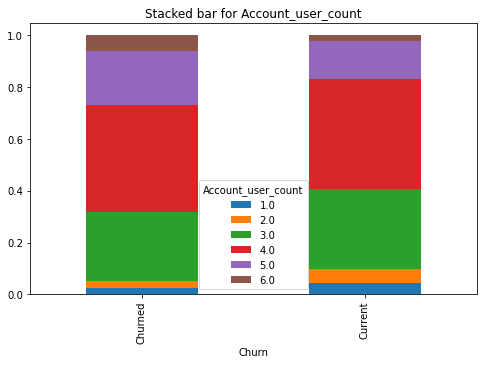

account_segment       HNI   Regular  Regular_Plus     Super  Super_Plus
Churn                                                                  
Churned          0.135783  0.021299      0.600106  0.221512    0.021299
Current          0.149058  0.051696      0.322779  0.392676    0.083791


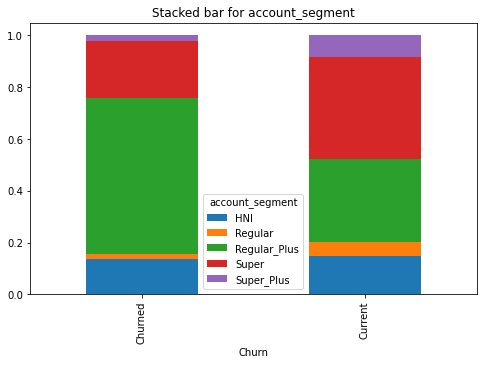

CC_Agent_Score       1.0       2.0       3.0       4.0       5.0
Churn                                                           
Churned         0.140875  0.078442  0.307898  0.194237  0.278549
Current         0.219849  0.109709  0.300216  0.190183  0.180043


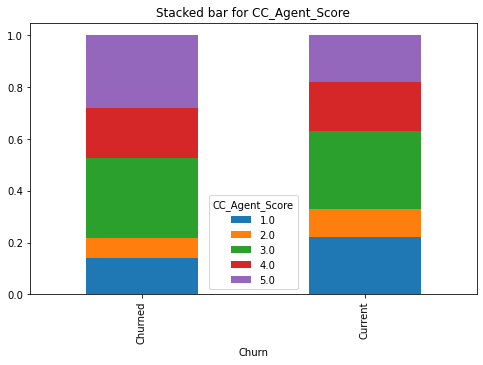

Marital_Status  Divorced   Married    Single
Churn                                       
Churned         0.130901  0.361052  0.508047
Current         0.155052  0.564787  0.280161


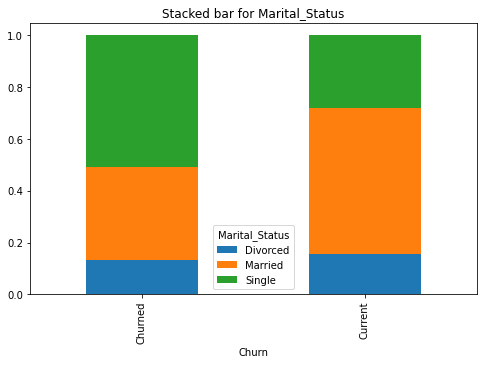

Complain_ly       0.0       1.0
Churn                          
Churned      0.462459  0.537541
Current      0.765803  0.234197


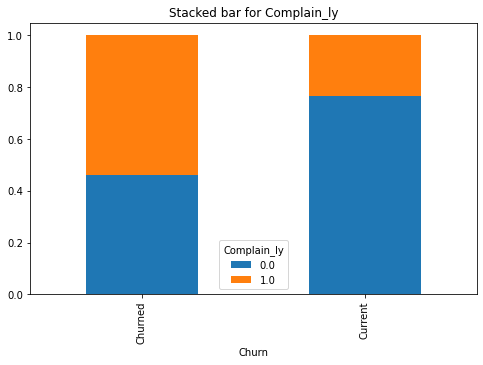

Login_device  Computer    Mobile
Churn                           
Churned       0.337479  0.662521
Current       0.277288  0.722712


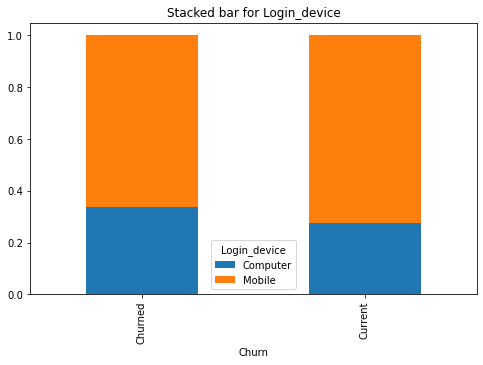

In [95]:
for i in cat_cols:
    tab = pd.crosstab(df['Churn'],df[i],normalize='index')
    print(tab)
    tab.plot(kind='bar', stacked = True, figsize=(8,5))
    plot_title = "Stacked bar for " + i
    plt.title(plot_title)
    plt.show();

##### Observations

#### Chi squared test for independence - feature selection

#### Hypothesis:

#### Questions to be answered through this test

#### Chi2 test for Gender and Churn

In [96]:
gender_churn_ct = pd.crosstab(index = df['Gender'], columns = df['Churn'])
gender_churn_ct

Churn,Churned,Current
Gender,,
Female,689,3759
Male,1185,5519


In [97]:
gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values

(array([ 689, 3759], dtype=int64), array([1185, 5519], dtype=int64))

In [98]:
from scipy import stats

In [99]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [100]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   8.983145746725429
p-value    :   0.0027248115020348197
degree of freedom    :   1


In [101]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [102]:
op_table = pd.DataFrame(columns=['Variable','chi2','p-value','chi2_output'])

In [103]:
op_table

,Variable,chi2,p-value,chi2_output


In [104]:
dict = {'Variable':'Gender', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,0.002725,Reject Ho; Dependent.


#### Chi2 test for Service_Score

In [105]:
variable = 'Service_Score'

In [106]:
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
Service_Score,,
0.0,0,8
1.0,0,77
2.0,550,2701
3.0,936,4554
4.0,394,1937
5.0,0,5


In [107]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values, variable_churn_ct.iloc[5].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   18.41468968297087
p-value    :   0.002469165780736688
degree of freedom    :   5
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,0.002725,Reject Ho; Dependent.
1,Service_Score,18.414690,0.002469,Reject Ho; Dependent.


#### Chi2 test for City_Tier

In [108]:
variable = 'City_Tier'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
City_Tier,,
1.0,1056,6207
2.0,96,384
3.0,727,2678


In [109]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   80.28881725426068
p-value    :   3.677095031246197e-18
degree of freedom    :   2
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.


#### Chi2 test for Payment

In [110]:
variable = 'Payment'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
Payment,,
Cash on Delivery,254,760
Credit Card,499,3012
Debit Card,702,3885
E wallet,276,941
UPI,143,679


In [111]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   103.7996168922195
p-value    :   1.526348412908852e-21
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.


#### Chi2 test for Account_user_count

In [112]:
variable = 'Account_user_count'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
Account_user_count,,
1.0,44,402
2.0,48,478
3.0,489,2772
4.0,758,3811
5.0,382,1317
6.0,109,206


In [113]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values, variable_churn_ct.iloc[5].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   154.95944512866276
p-value    :   1.1735736543478535e-31
degree of freedom    :   5
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.


#### Chi2 test for account_segment

In [114]:
variable = 'account_segment'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
account_segment,,
HNI,255,1384
Regular,40,480
Regular_Plus,1127,2997
Super,416,3646
Super_Plus,40,778


In [115]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   567.0684021977117
p-value    :   2.073936753745742e-121
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.


#### Chi2 test for CC_Agent_Score

In [116]:
variable = 'CC_Agent_Score'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
CC_Agent_Score,,
1.0,264,2038
2.0,147,1017
3.0,577,2783
4.0,364,1763
5.0,522,1669


In [117]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   139.03156455862975
p-value    :   4.54952105322674e-29
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.


#### Chi2 test for Marital_Status

In [118]:
variable = 'Marital_Status'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
Marital_Status,,
Divorced,244,1424
Married,673,5187
Single,947,2573


In [119]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   379.8081234819416
p-value    :   3.355165093920422e-83
degree of freedom    :   2
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.


#### Chi2 test for Complain_ly

In [120]:
variable = 'Complain_ly'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,Churned,Current
Complain_ly,,
0.0,850,6942
1.0,988,2123


In [121]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   688.0847388901824
p-value    :   1.1662391608576007e-151
degree of freedom    :   1
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.
8,Complain_ly,688.084739,1.166239e-151,Reject Ho; Dependent.


### Pairplot

In [122]:
pair = df[num_cols]

In [123]:
pair['Churn'] = df['Churn']

<ipython-input-123-1724b9574eec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair['Churn'] = df['Churn']


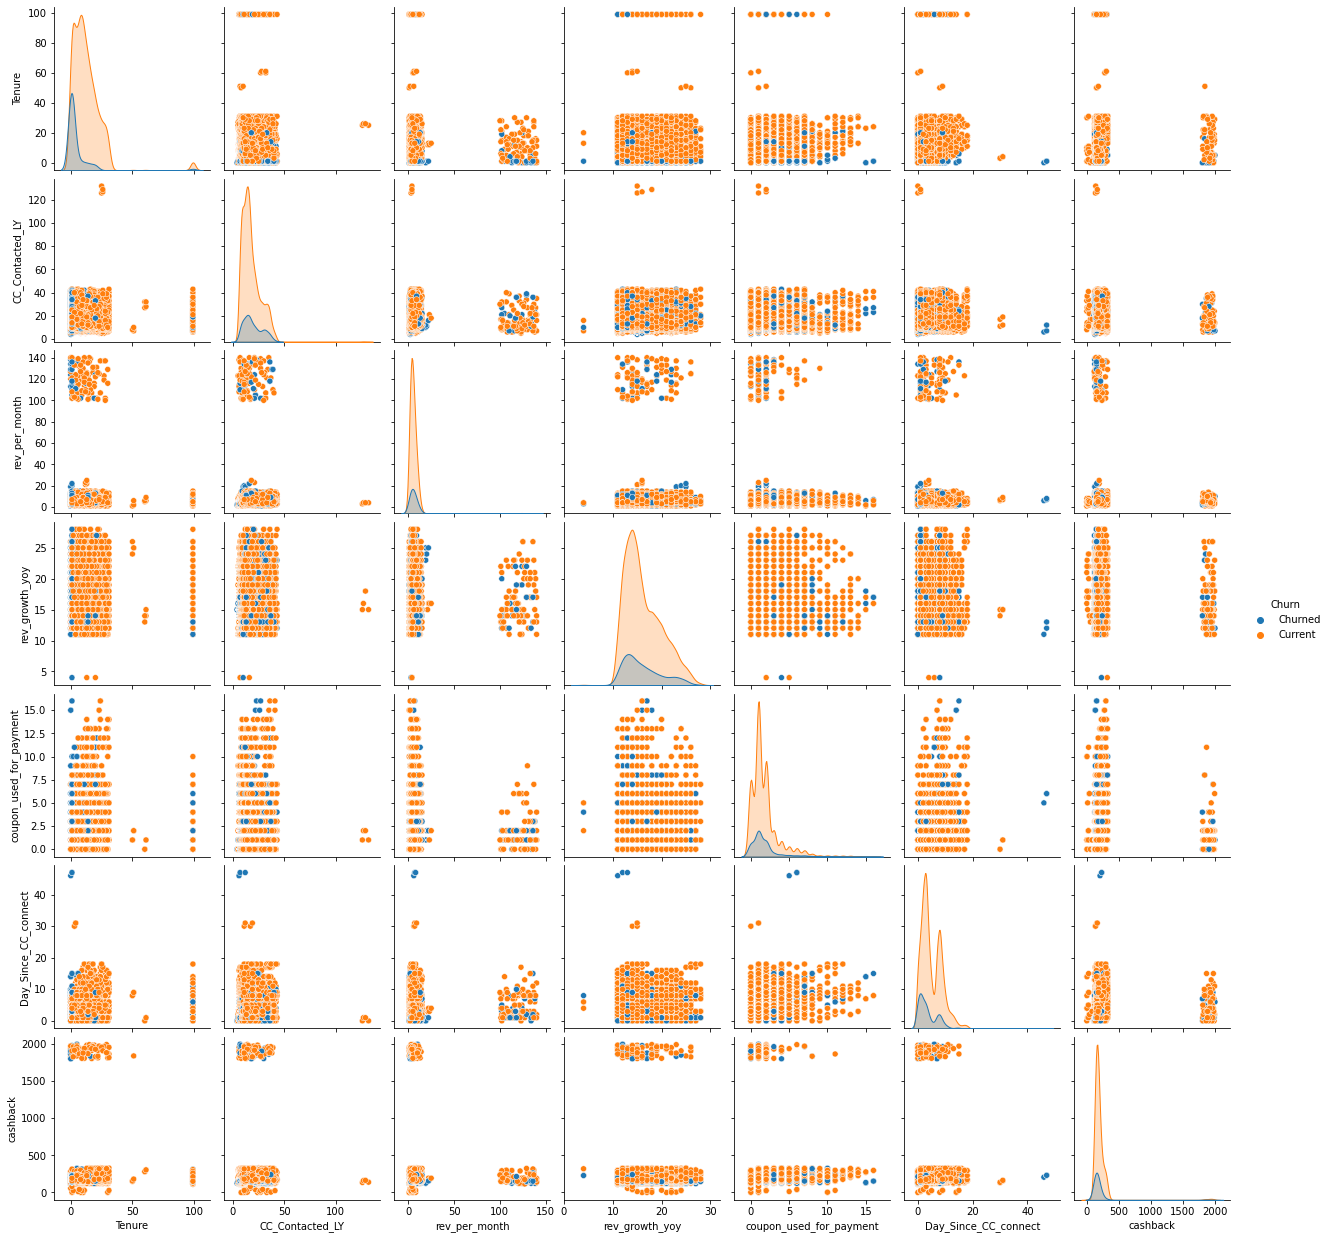

In [124]:
sns.pairplot(data=pair, hue='Churn');

#### Correlation Matrix

<ipython-input-125-e62636c24be2>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


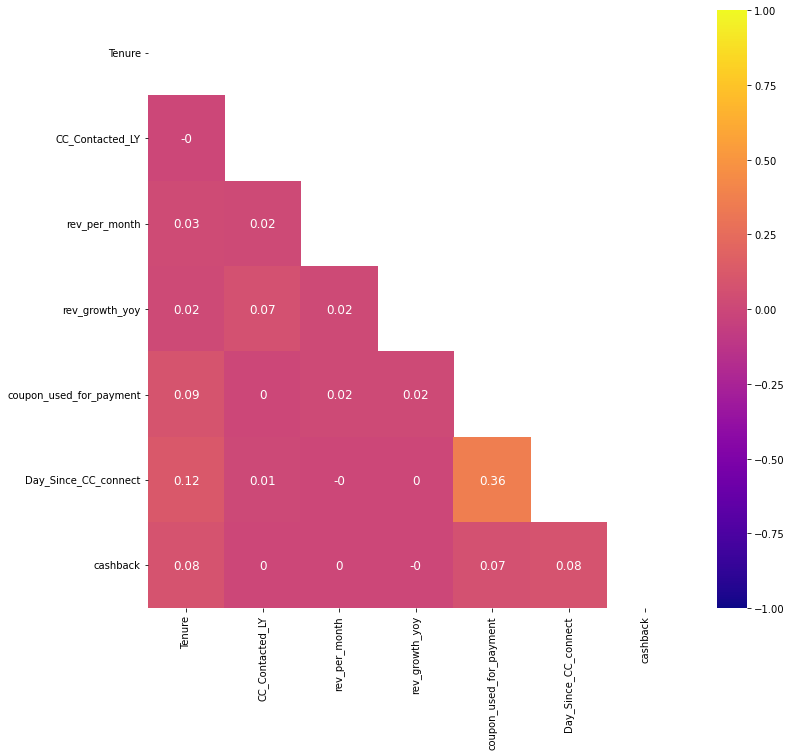

In [125]:
df_num = df[num_cols]
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))

plt.figure(figsize = (12,11))
sns.heatmap(round(corr,2), annot=True, mask=mask, cmap='plasma', vmin=-1, vmax=1, annot_kws={'size':12});

#### Observations:

#### Replacing 0s and 1s in Target column 'Churn'

In [126]:
df['Churn'] = df['Churn'].replace( {'Churned': 1, 'Current': 0} )

In [127]:
df['Churn'].dtypes

dtype('int64')

#### Removal of unwanted variables - Dropping AccountID

In [128]:
df.drop(["AccountID","rev_growth_yoy", "coupon_used_for_payment"], axis=1, inplace=True)

In [129]:
df.shape

(11260, 16)

### One hot/dummy encoding

In [130]:
OneHotCols = ['Payment','Gender','account_segment','Marital_Status','Login_device']

In [131]:
df = pd.get_dummies(df, columns=OneHotCols, drop_first=True)

In [132]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Day_Since_CC_connect,...,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular_Plus,account_segment_Super,account_segment_Super_Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,...,0,0,0,0,0,1,0,0,1,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,...,0,1,1,0,1,0,0,0,1,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,...,0,0,1,0,1,0,0,0,1,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,...,0,0,1,0,0,1,0,0,1,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,...,0,0,1,0,1,0,0,0,1,1


In [133]:
df.shape

(11260, 23)

In [134]:
# Got to check if column names are ok after one hot encoding

df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'Day_Since_CC_connect', 'cashback', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular_Plus',
       'account_segment_Super', 'account_segment_Super_Plus',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile'],
      dtype='object')

In [135]:
# Blanks in 'Credit card', 'E wallet' and 'Debit card' to be removed; Super Plus and Regular Plus also shortened

df.columns = ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'User_Count', 'CC_Score', 'Rev_Permonth', 'Complain_LY',
       'Days_Since_CC', 'Cashback', 'Payment_Creditcard',
       'Payment_Debitcard', 'Payment_Ewallet', 'Payment_UPI', 'Gender_Male',
       'ACSegment_Regular', 'ACSegment_Regularplus',
       'ACSegment_Super', 'ACSegment_Superplus',
       'Maritalstatus_Married', 'Maritalstatus_Single',
       'Logindevice_Mobile']

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  11260 non-null  int64  
 1   Tenure                 11042 non-null  float64
 2   City_Tier              11148 non-null  float64
 3   CC_Contacted_LY        11158 non-null  float64
 4   Service_Score          11162 non-null  float64
 5   User_Count             10816 non-null  float64
 6   CC_Score               11144 non-null  float64
 7   Rev_Permonth           10469 non-null  float64
 8   Complain_LY            10903 non-null  float64
 9   Days_Since_CC          10902 non-null  float64
 10  Cashback               10787 non-null  float64
 11  Payment_Creditcard     11260 non-null  uint8  
 12  Payment_Debitcard      11260 non-null  uint8  
 13  Payment_Ewallet        11260 non-null  uint8  
 14  Payment_UPI            11260 non-null  uint8  
 15  Ge

## Missing Value Treatment

In [137]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X.shape, y.shape

((11260, 22), (11260,))

### Scaling before KNN imputing

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [139]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,11042.0,-1.963025e-16,1.000045,-0.856038,-0.700749,-0.157237,0.386275,6.830775
City_Tier,11148.0,4.773919e-16,1.000045,-0.714697,-0.714697,-0.714697,1.471157,1.471157
CC_Contacted_LY,11158.0,1.645236e-15,1.000045,-1.566394,-0.775691,-0.210902,0.579802,12.892189
Service_Score,11162.0,4.623161e-15,1.000045,-4.000444,-1.243919,0.134344,0.134344,2.890870
User_Count,10816.0,7.944520e-15,1.000046,-2.632502,-0.677332,0.300253,0.300253,2.255423
CC_Score,11144.0,4.187415e-16,1.000045,-1.497773,-0.772983,-0.048194,0.676596,1.401386
Rev_Permonth,10469.0,-1.815649e-15,1.000048,-0.450293,-0.282355,-0.114416,0.053522,11.221437
Complain_LY,10903.0,-5.303166e-17,1.000046,-0.631867,-0.631867,-0.631867,1.582612,1.582612
Days_Since_CC,10902.0,1.741763e-16,1.000046,-1.253070,-0.712160,-0.441704,0.910573,11.458334
Cashback,10787.0,3.458061e-17,1.000046,-1.098427,-0.274423,-0.173445,0.021123,10.079715


## KNN Imputing

In [140]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

In [141]:
X.isnull().sum()

Tenure                   0
City_Tier                0
CC_Contacted_LY          0
Service_Score            0
User_Count               0
CC_Score                 0
Rev_Permonth             0
Complain_LY              0
Days_Since_CC            0
Cashback                 0
Payment_Creditcard       0
Payment_Debitcard        0
Payment_Ewallet          0
Payment_UPI              0
Gender_Male              0
ACSegment_Regular        0
ACSegment_Regularplus    0
ACSegment_Super          0
ACSegment_Superplus      0
Maritalstatus_Married    0
Maritalstatus_Single     0
Logindevice_Mobile       0
dtype: int64

##### Observations:

In [142]:
X_inverse_with_outlier = pd.DataFrame(scaler.inverse_transform(X), columns=X.columns)

In [143]:
X_inverse_with_outlier.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Payment_Ewallet,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,159.930,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,120.900,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.272,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.070,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,129.600,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [144]:
## Writing the null treated dataset separately for models that are outlier resistant

df_with_outlier = pd.concat([round(X_inverse_with_outlier,0),y], axis = 1)
df_with_outlier.to_csv("df_with_outlier.csv")

## Outlier treatment

In [145]:
Outlier_treat_vars = ['Tenure','CC_Contacted_LY','Rev_Permonth','Days_Since_CC','Cashback']

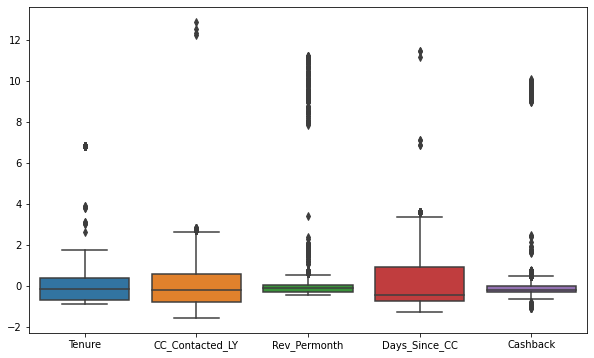

In [146]:
plt.figure(figsize=(10,6))
sns.boxplot(data = X[Outlier_treat_vars]);

##### Creating a user defined function for finding the lower and upper range for a variable so that outlier can be treated.

In [147]:
def out_limit(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [148]:
for column in Outlier_treat_vars:
    lr,ur = out_limit(X[column])
    X[column] = np.where(X[column] > ur, ur, X[column])
    X[column] = np.where(X[column] < lr, lr, X[column])

##### The outliers have now been treated with lower and upper range. Plotting box plot after outlier treatment

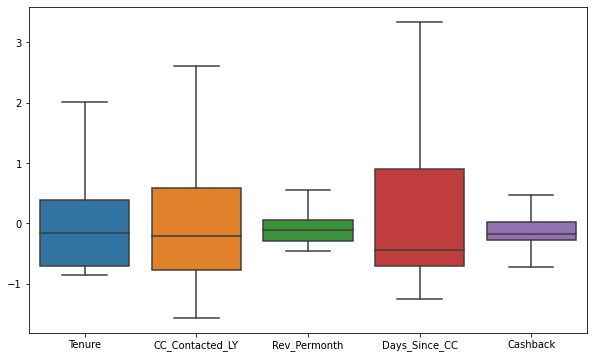

In [149]:
plt.figure(figsize=(10,6))
sns.boxplot(data = X[Outlier_treat_vars]);

In [150]:
num_cols = ['Tenure', 'CC_Contacted_LY', 'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Cashback']
cols = ['Skewness']
pd.DataFrame(X[num_cols].skew().round(2), columns=cols)

,Skewness
Tenure,0.80
CC_Contacted_LY,0.80
Rev_Permonth,0.78
Complain_LY,0.95
Days_Since_CC,0.82
Cashback,0.93


In [151]:
## Inverse transforming X so that the dataset is reversed to its old values (reverse of scaling). This is done for two reasons:
## 1) Coefficients for logistic regression can be interpreted : Odds ratio of that variable = e power coefficient
## Reference: https://quantifyinghealth.com/interpret-logistic-regression-coefficients/
## 2) Train dataset and test dataset can be scaled separately for distance based algorithms where it is required

X_inverse_without_outlier = pd.DataFrame(scaler.inverse_transform(X), columns=X.columns)

In [152]:
X_inverse_without_outlier.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'User_Count',
       'CC_Score', 'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Cashback',
       'Payment_Creditcard', 'Payment_Debitcard', 'Payment_Ewallet',
       'Payment_UPI', 'Gender_Male', 'ACSegment_Regular',
       'ACSegment_Regularplus', 'ACSegment_Super', 'ACSegment_Superplus',
       'Maritalstatus_Married', 'Maritalstatus_Single', 'Logindevice_Mobile'],
      dtype='object')

In [153]:
df_total = pd.concat([round(X_inverse_without_outlier,0),y],axis=1)

In [154]:
df_total.to_csv('df_without_outlier.csv', index=False) ## Saving the file to disk for modeling so that all the preprocess need not be repeated

## Bivariate graphs after outlier & missing value treatment

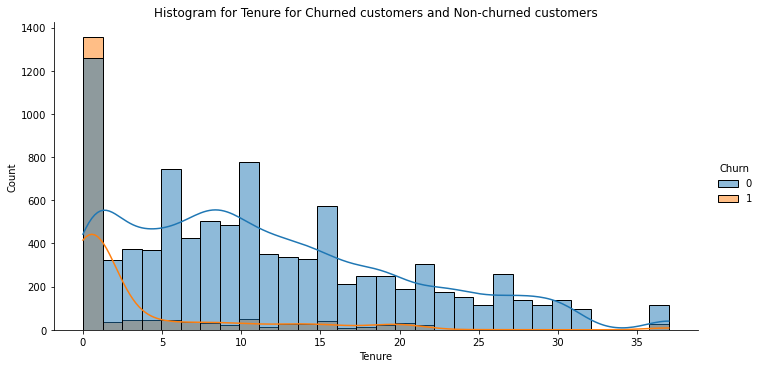

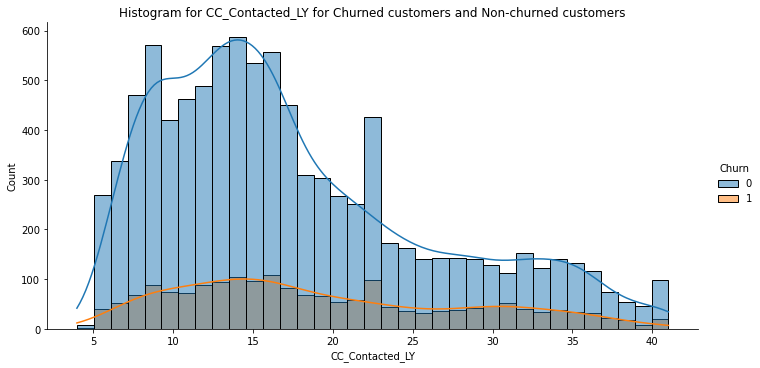

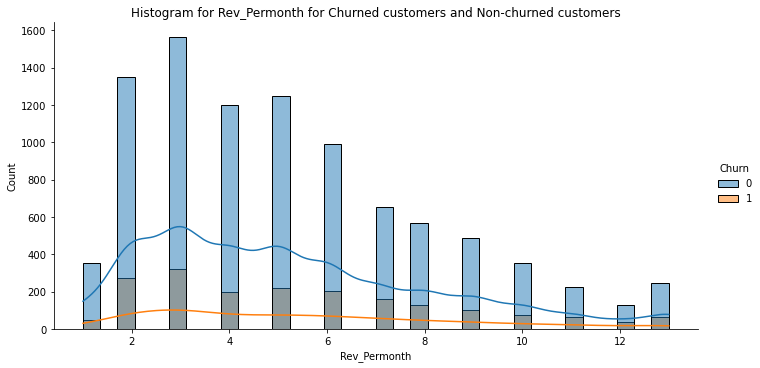

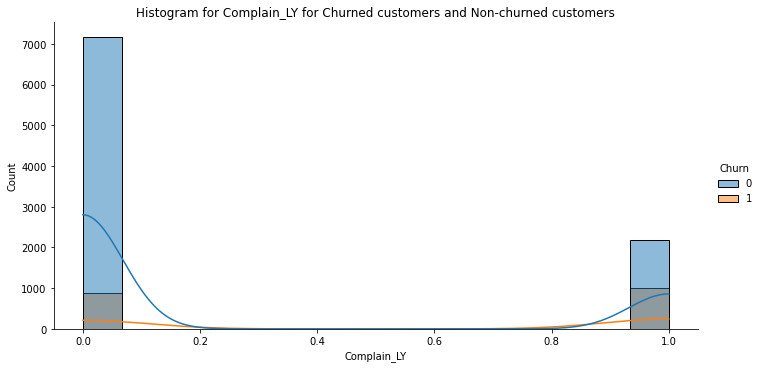

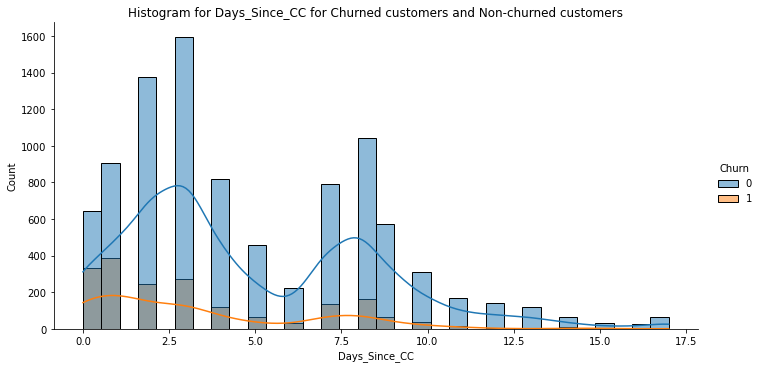

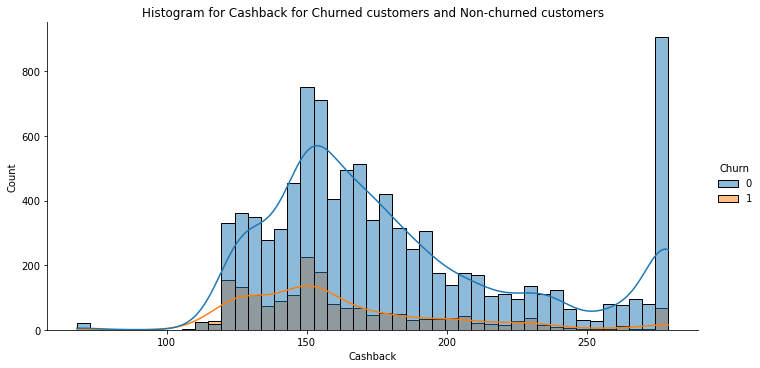

In [155]:
for i in num_cols:
    sns.displot(x=df_total[i], hue=df_total['Churn'], kind='hist', kde=True, aspect=2)
    plot_title = "Histogram for " + i + " for Churned customers and Non-churned customers"
    plt.title(plot_title)
    plt.show();

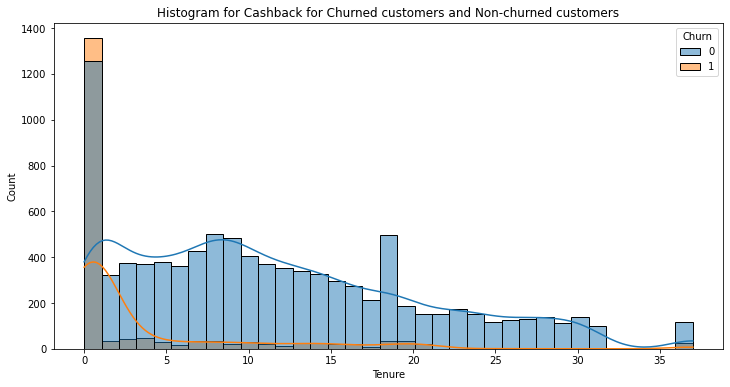

In [156]:
plt.figure(figsize=(12,6))
sns.histplot(x=df_total['Tenure'], kde=True, bins = 35, hue=df_total['Churn'])
plot_title = "Histogram for " + i + " for Churned customers and Non-churned customers"
plt.title(plot_title)
plt.show();

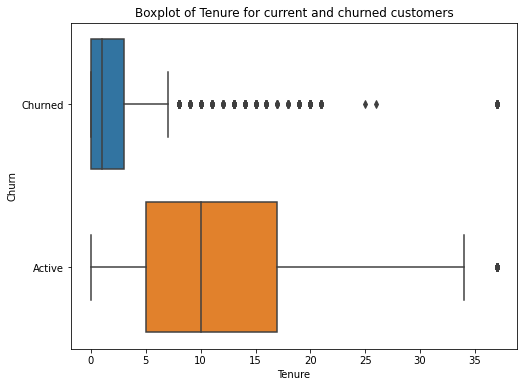

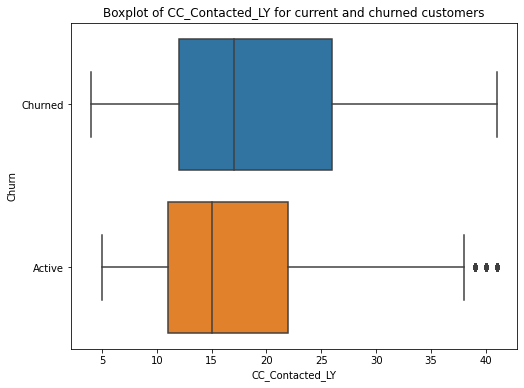

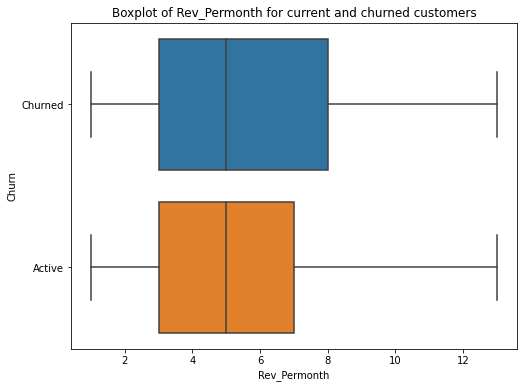

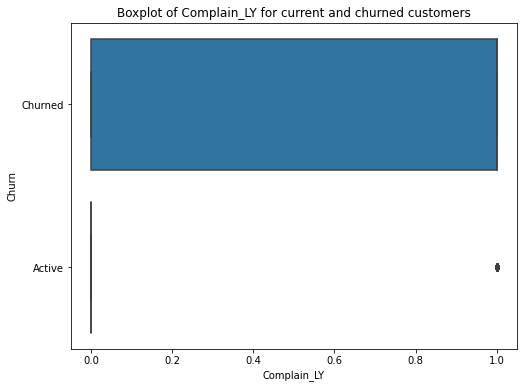

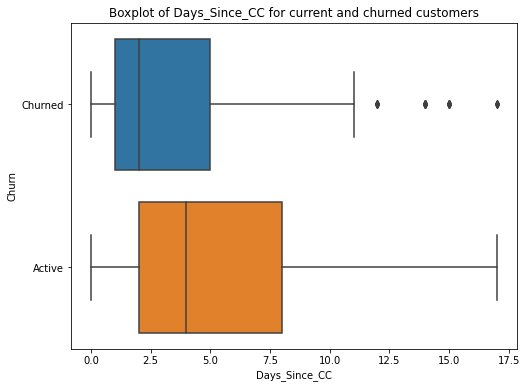

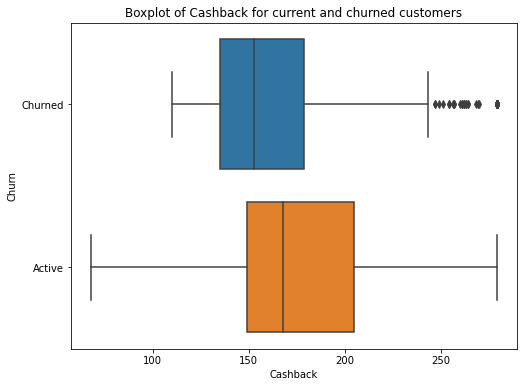

In [157]:
df_total_churn = df_total['Churn'].replace( {1: 'Churned', 0: 'Active'} ) ## y needs to be categorical
for i in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_total[i], y=df_total_churn)
    plot_title = 'Boxplot of ' + i + " for current and churned customers"
    plt.title(plot_title)
    plt.show();

### Clustering using KPrototypes for categorical and numerical variables

In [158]:
!pip install kmodes

In [159]:
X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'User_Count',
       'CC_Score', 'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Cashback',
       'Payment_Creditcard', 'Payment_Debitcard', 'Payment_Ewallet',
       'Payment_UPI', 'Gender_Male', 'ACSegment_Regular',
       'ACSegment_Regularplus', 'ACSegment_Super', 'ACSegment_Superplus',
       'Maritalstatus_Married', 'Maritalstatus_Single', 'Logindevice_Mobile'],
      dtype='object')

In [160]:
cat_columns_idx = [1,3,5,7,10,11,12,13,14,15,16,17,18,19,20,21]

#### Clusters=2

In [161]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)
kproto.fit(X, categorical=cat_columns_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 682, ncost: 54253.94946139499
Run: 1, iteration: 2/20, moves: 389, ncost: 54174.82640204741
Run: 1, iteration: 3/20, moves: 364, ncost: 54091.77781656358
Run: 1, iteration: 4/20, moves: 444, ncost: 53949.639899359536
Run: 1, iteration: 5/20, moves: 511, ncost: 53726.97517074785
Run: 1, iteration: 6/20, moves: 469, ncost: 53540.9301273079
Run: 1, iteration: 7/20, moves: 227, ncost: 53500.16734453307
Run: 1, iteration: 8/20, moves: 100, ncost: 53493.961282041586
Run: 1, iteration: 9/20, moves: 53, ncost: 53491.838539610326
Run: 1, iteration: 10/20, moves: 57, ncost: 53489.88931522135
Run: 1, iteration: 11/20, moves: 21, ncost: 53489.64678371642
Run: 1, iteration: 12/20, moves: 3, ncost: 53489.63304357718
Run: 1, iteration: 13/20, moves: 2, ncost: 53489.619730063074
Run: 1, iteration: 14/20, moves: 3, nc

KPrototypes(gamma=0.38106030596163365, max_iter=20, n_clusters=2, verbose=2)

In [163]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[[ 0.10614074  0.02969375 -0.03486438 -0.11378087  1.10184521  0.00595215
  -0.71469661  0.13434419 -0.04819358 -0.6318668  -0.67312014 -0.82909407
  -0.34810764 -0.28062558  0.82437508 -0.22003893 -0.76020708 -0.75121463
  -0.27988834  0.9599488  -0.67437405  0.71059496]
 [-0.15129816 -0.02513561  0.01909844 -0.07736735 -0.63840174 -0.159173
  -0.71469661  0.13434419 -0.04819358 -0.6318668  -0.67312014 -0.82909407
  -0.34810764 -0.28062558  0.82437508 -0.22003893 -0.76020708 -0.75121463
  -0.27988834 -1.04172222 -0.67437405  0.71059496]]


In [164]:
# Prediction
clusters2 = kproto.predict(X, categorical=cat_columns_idx)

In [165]:
df['kproto_2clusters'] = clusters2

In [166]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,...,0,0,0,0,1,0,0,1,1,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,...,1,1,0,1,0,0,0,1,1,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,...,0,1,0,1,0,0,0,1,1,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,...,0,1,0,0,1,0,0,1,1,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,...,0,1,0,1,0,0,0,1,1,1


In [167]:
df[df['kproto_2clusters']==1].head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,...,0,0,0,0,1,0,0,1,1,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,...,1,1,0,1,0,0,0,1,1,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,...,0,1,0,1,0,0,0,1,1,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,...,0,1,0,0,1,0,0,1,1,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,...,0,1,0,1,0,0,0,1,1,1
6,1,2.0,3.0,11.0,2.0,3.0,2.0,4.0,0.0,0.0,...,0,1,0,0,1,0,0,0,1,1
7,1,0.0,1.0,6.0,3.0,3.0,2.0,3.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,1
8,1,13.0,3.0,9.0,2.0,4.0,3.0,2.0,1.0,2.0,...,0,1,0,1,0,0,0,0,1,1
9,1,0.0,1.0,31.0,2.0,5.0,3.0,2.0,0.0,1.0,...,0,1,0,1,0,0,0,1,1,1
11,1,11.0,1.0,6.0,3.0,4.0,3.0,10.0,1.0,0.0,...,0,1,0,0,0,0,0,1,1,1


In [168]:
clust2_profile=df.copy()
clust2_profile=clust2_profile.groupby('kproto_2clusters').mean()
clust2_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_Ewallet,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile
kproto_2clusters,,,,,,,,,,,,,,,,,,,,,
0,0.112006,13.161194,1.675462,18.141767,2.942118,3.658388,3.100789,6.246640,0.264996,8.774931,...,0.121767,0.069790,0.578575,0.086140,0.147877,0.400439,0.116154,0.568082,0.269644,0.656174
1,0.200642,9.802193,1.641618,17.709796,2.879893,3.712664,3.046853,6.428529,0.296893,2.250831,...,0.100251,0.074839,0.604999,0.023318,0.491204,0.338034,0.047752,0.493158,0.337196,0.669226


#### Clusters=3

In [169]:
kproto3 = KPrototypes(n_clusters=3, verbose=2, max_iter=20, random_state=1)
kproto3.fit(X, categorical=cat_columns_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2378, ncost: 48788.8088617667
Run: 1, iteration: 2/20, moves: 1234, ncost: 48021.6756368359
Run: 1, iteration: 3/20, moves: 694, ncost: 47865.03578174141
Run: 1, iteration: 4/20, moves: 470, ncost: 47775.5048070835
Run: 1, iteration: 5/20, moves: 349, ncost: 47718.16403189902
Run: 1, iteration: 6/20, moves: 504, ncost: 47526.2545190835
Run: 1, iteration: 7/20, moves: 552, ncost: 47362.23712662446
Run: 1, iteration: 8/20, moves: 540, ncost: 47168.357622790056
Run: 1, iteration: 9/20, moves: 499, ncost: 47003.034998273906
Run: 1, iteration: 10/20, moves: 314, ncost: 46946.90559255801
Run: 1, iteration: 11/20, moves: 125, ncost: 46937.187502484296
Run: 1, iteration: 12/20, moves: 43, ncost: 46935.90445346347
Run: 1, iteration: 13/20, moves: 12, ncost: 46935.81860815912
Run: 1, iteration: 14/20, moves: 8,

Run: 10, iteration: 6/20, moves: 28, ncost: 47757.21165945727
Run: 10, iteration: 7/20, moves: 17, ncost: 47756.97267292023
Run: 10, iteration: 8/20, moves: 8, ncost: 47756.896896905215
Run: 10, iteration: 9/20, moves: 1, ncost: 47756.89518414609
Run: 10, iteration: 10/20, moves: 0, ncost: 47756.89518414609
Best run was number 9


KPrototypes(gamma=0.38106030596163365, max_iter=20, n_clusters=3,
            random_state=1, verbose=2)

In [170]:
# Prediction
clusters3 = kproto3.predict(X, categorical=cat_columns_idx)
df['kproto_3clusters'] = clusters3

In [171]:
clust3_profile=df.copy()
clust3_profile=clust3_profile.groupby('kproto_3clusters').mean()
clust3_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters
kproto_3clusters,,,,,,,,,,,,,,,,,,,,,
0,0.187416,9.499015,1.600000,13.305577,2.855501,3.675453,3.056379,6.323737,0.292164,2.219717,...,0.075468,0.609535,0.026057,0.540822,0.306312,0.044393,0.464196,0.359390,0.671492,0.992472
1,0.096765,13.621100,1.715588,14.997355,2.925544,3.669191,3.102383,6.149150,0.253474,8.873577,...,0.072574,0.585835,0.101428,0.132031,0.392888,0.114252,0.572136,0.270184,0.660157,0.032644
2,0.223943,10.643872,1.679526,30.488770,2.964625,3.757564,3.039710,6.714170,0.313060,3.826087,...,0.068731,0.580060,0.013973,0.328172,0.425604,0.074018,0.563444,0.276057,0.656344,0.720544


In [172]:
df.groupby('kproto_3clusters')['Churn'].count()

kproto_3clusters
0    5181
1    3431
2    2648
Name: Churn, dtype: int64

In [173]:
clust3_profile.to_excel("cluster_profile.xlsx")

#### Clusters = 4

In [174]:
kproto4 = KPrototypes(n_clusters=4, verbose=2, max_iter=20)
kproto4.fit(X, categorical=cat_columns_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3261, ncost: 45283.17093633659
Run: 1, iteration: 2/20, moves: 1378, ncost: 44566.307643920794
Run: 1, iteration: 3/20, moves: 1438, ncost: 43613.829747958596
Run: 1, iteration: 4/20, moves: 1089, ncost: 43042.5279797614
Run: 1, iteration: 5/20, moves: 609, ncost: 42818.42288282366
Run: 1, iteration: 6/20, moves: 315, ncost: 42794.566360805344
Run: 1, iteration: 7/20, moves: 73, ncost: 42792.71297025433
Run: 1, iteration: 8/20, moves: 17, ncost: 42792.44205924532
Run: 1, iteration: 9/20, moves: 11, ncost: 42792.391914816144
Run: 1, iteration: 10/20, moves: 1, ncost: 42792.39080965299
Run: 1, iteration: 11/20, moves: 0, ncost: 42792.39080965299
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 2630, ncost: 46730.342456815335
Run: 2, iteratio

Run: 8, iteration: 20/20, moves: 5, ncost: 42792.383237187794
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/20, moves: 3968, ncost: 44130.82509643467
Run: 9, iteration: 2/20, moves: 1840, ncost: 43225.44712640546
Run: 9, iteration: 3/20, moves: 774, ncost: 42915.60298100215
Run: 9, iteration: 4/20, moves: 487, ncost: 42838.14762549043
Run: 9, iteration: 5/20, moves: 281, ncost: 42819.71163682279
Run: 9, iteration: 6/20, moves: 68, ncost: 42817.462560610176
Run: 9, iteration: 7/20, moves: 8, ncost: 42817.412321825475
Run: 9, iteration: 8/20, moves: 4, ncost: 42817.38602054713
Run: 9, iteration: 9/20, moves: 0, ncost: 42817.38602054713
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/20, moves: 2408, ncost: 43955.96633253756
Run: 10, iteration: 2/20, moves: 1026, ncost: 43358.50127432643
Run: 10, iteration: 3/20, moves: 429, ncost: 43281.6573119546
Run: 10, iteration: 4/20, moves: 

KPrototypes(gamma=0.38106030596163365, max_iter=20, n_clusters=4, verbose=2)

In [175]:
# Prediction
clusters4 = kproto4.predict(X, categorical=cat_columns_idx)
df['kproto_4clusters'] = clusters4

In [176]:
clust4_profile=df.copy()
clust4_profile=clust4_profile.groupby('kproto_4clusters').mean()
clust4_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters,kproto_3clusters
kproto_4clusters,,,,,,,,,,,,,,,,,,,,,
0,0.221586,10.921005,1.670080,31.431869,2.971162,3.826287,3.053405,6.635975,0.303774,3.968022,...,0.573128,0.013656,0.322026,0.420705,0.079295,0.548899,0.281498,0.657269,0.692070,1.996035
1,0.141136,9.565004,1.632128,14.353043,2.516678,2.564166,3.079122,6.013955,0.289922,3.193182,...,0.610671,0.023408,0.440620,0.367298,0.055766,0.526334,0.306368,0.675731,0.777625,0.354217
2,0.089763,14.566452,1.705243,15.467464,3.004865,3.948897,3.116766,6.241435,0.246723,9.398628,...,0.589763,0.123516,0.109421,0.375371,0.127596,0.571958,0.270030,0.650964,0.009644,1.007418
3,0.218649,9.532612,1.620977,13.682956,3.105718,4.378237,3.024434,6.575997,0.299514,2.496486,...,0.601652,0.025966,0.536441,0.303334,0.038950,0.455297,0.372676,0.670404,0.975509,0.133078


### Writing 3 cluster numbers in files with and w/o outliers

In [177]:
df_with_outlier['Clusters'] = clusters3
df_with_outlier.to_csv("df_with_outlier.csv", index=False)

In [178]:
df_total['Clusters'] = clusters3
df_total.to_csv('df_without_outlier.csv', index=False)

### Analysis of key variables to gain further insights

#### Cashback and Coupon used for payment variables against Churn and Tenure (low and high bins)

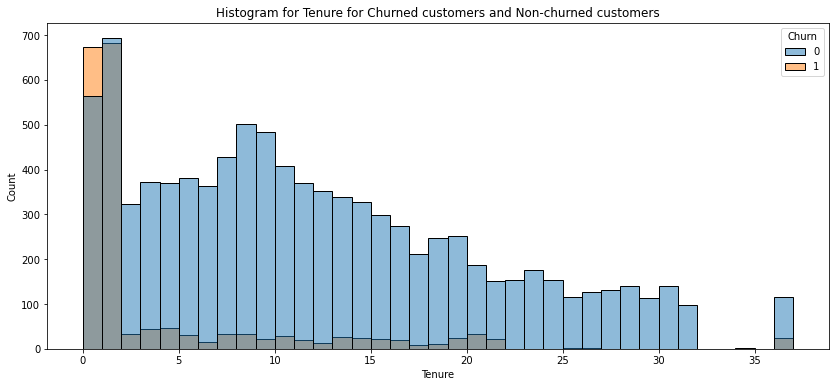

In [179]:
plt.figure(figsize=(14,6))
sns.histplot(x=df_total['Tenure'], bins = 37, hue=df_total['Churn'])
plot_title = "Histogram for " + "Tenure" + " for Churned customers and Non-churned customers"
plt.title(plot_title)
plt.show();

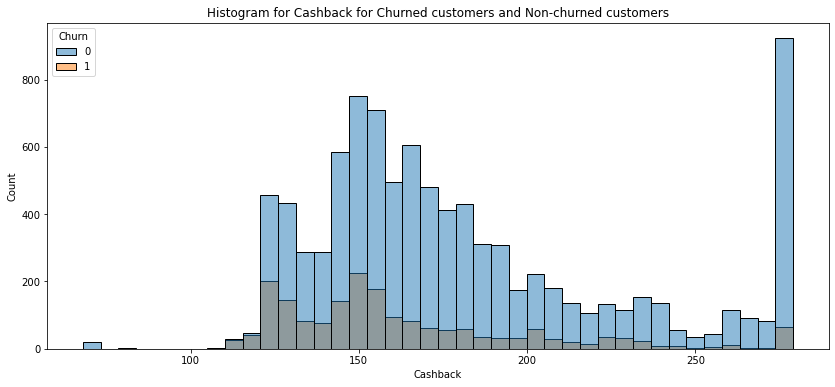

In [180]:
# Cashback histplot wrt churn

plt.figure(figsize=(14,6))
sns.histplot(x=df_total['Cashback'], bins = 40, hue=df_total['Churn'])
plot_title = "Histogram for " + "Cashback" + " for Churned customers and Non-churned customers"
plt.title(plot_title)
plt.show();

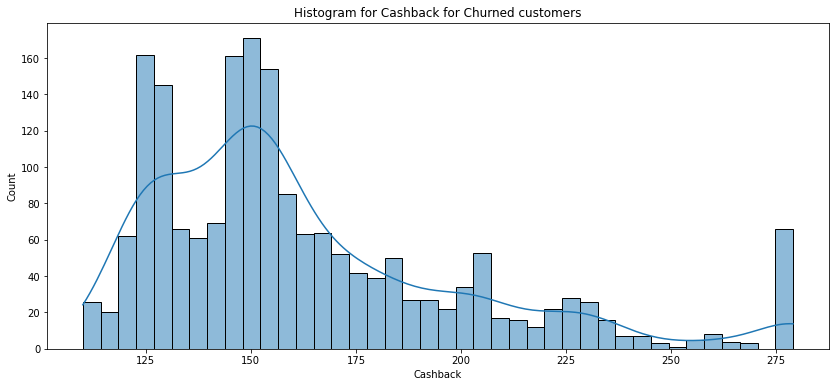

In [181]:
# Cashback offers for only churned customers

plt.figure(figsize=(14,6))
sns.histplot(x=df_total[df_total['Churn']==1]['Cashback'], kde=True, bins = 40)
plot_title = "Histogram for " + "Cashback" + " for Churned customers"
plt.title(plot_title)
plt.show();

In [182]:
### MEDIAN CASHBACK FOR CHURNED AND NON-CHURNED CUSTOMERS

df_total[df_total['Churn']==1]['Cashback'].median(), df_total[df_total['Churn']==0]['Cashback'].median()

(153.0, 168.0)

In [183]:
### Statistical description of cashback for churned customers

pd.DataFrame(df_total[df_total['Churn']==1]['Cashback'].describe() )

,Cashback
count,1896.000000
mean,163.103376
std,38.422260
min,110.000000
25%,135.000000
50%,153.000000
75%,179.000000
max,279.000000


In [184]:
### Statistical description of cashback for active customers

pd.DataFrame(df_total[df_total['Churn']==0]['Cashback'].describe() )

,Cashback
count,9364.000000
mean,181.617044
std,46.632509
min,68.000000
25%,149.000000
50%,168.000000
75%,205.000000
max,279.000000


In [185]:
df_temp=df_total.copy()

In [186]:
df_temp['Tenure_bin'] = np.where(df_temp['Tenure'] <= 2 , 'Tenure<=2', 'Other_Tenure')

In [187]:
df_temp['Tenure_bin'].value_counts()

Other_Tenure    8288
Tenure<=2       2972
Name: Tenure_bin, dtype: int64

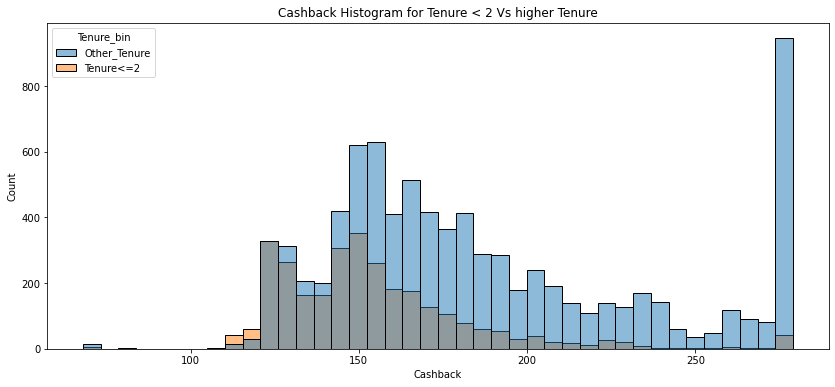

In [188]:
## Histplot of cashback with Tenure as hue

plt.figure(figsize=(14,6))
sns.histplot(x=df_temp['Cashback'], bins = 40, hue=df_temp['Tenure_bin'])
plot_title = "Cashback Histogram" + " for Tenure < 2 Vs higher Tenure"
plt.title(plot_title)
plt.show();

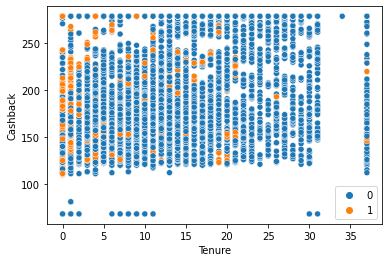

In [189]:
# Scatter plot of Tenure and Cashback

sns.scatterplot(x=df_total['Tenure'], y=df_total['Cashback'], hue=df_total['Churn'])
plt.legend(loc='lower right');

In [190]:
 df_predictor.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [191]:
# Copying this and adding churn field

df_temp1 = df_predictor.copy()
df_temp1['Churn'] = df_total['Churn']

In [193]:
### Analysis of coupon_used_for_payment

df_temp1.coupon_used_for_payment.value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

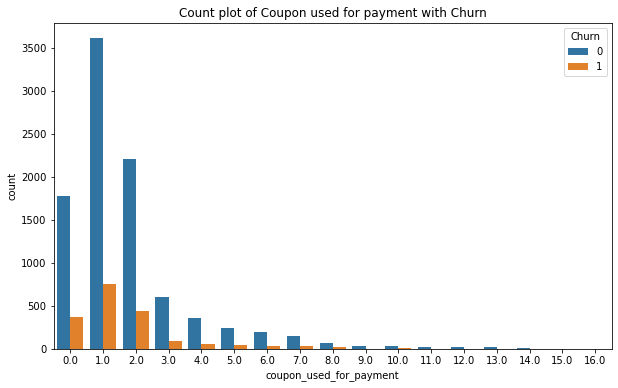

In [194]:
### Distribution of coupon_used_for_payment by churn

plt.figure(figsize=(10,6))
sns.countplot(data = df_temp1, x='coupon_used_for_payment', hue='Churn')
plot_title = "Count plot of "+"Coupon used for payment"+" with Churn"
plt.title(plot_title)
plt.show();

In [195]:
df_temp1['Tenure_bin'] = df_temp['Tenure_bin']

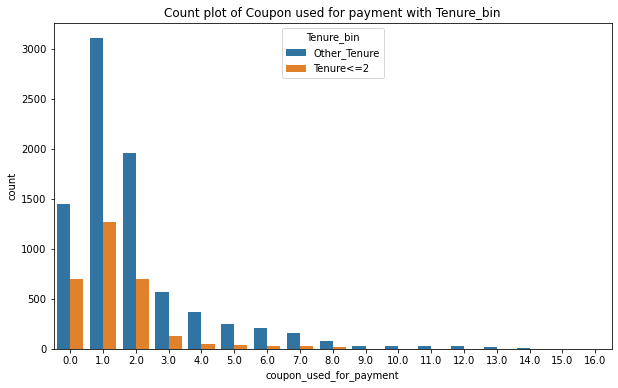

In [196]:
### Distribution of coupon_used_for_payment by tenure bin

plt.figure(figsize=(10,6))
sns.countplot(data = df_temp1, x='coupon_used_for_payment', hue='Tenure_bin')
plot_title = "Count plot of "+"Coupon used for payment"+" with Tenure_bin"
plt.title(plot_title)
plt.show();

### Days since customer care contact, CC contacted last year, Complaint raised last year

In [197]:
df_temp1.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Churn', 'Tenure_bin'],
      dtype='object')

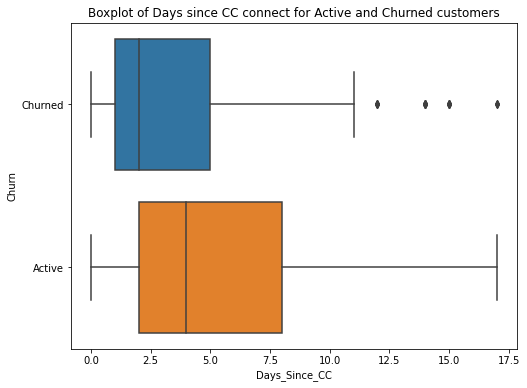

In [198]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_total["Days_Since_CC"], y=df_total_churn)
plot_title = 'Boxplot of ' + "Days since CC connect" + " for Active and Churned customers"
plt.title(plot_title)
plt.show();

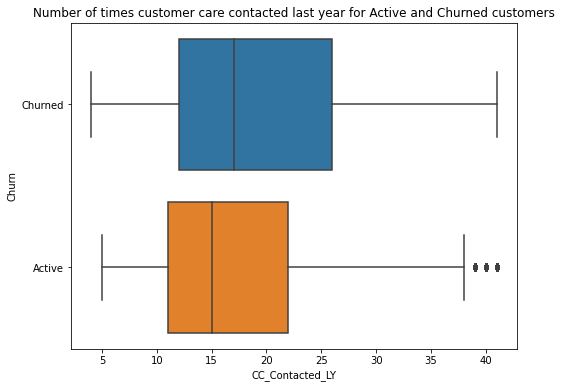

In [199]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_total["CC_Contacted_LY"], y=df_total_churn)
plot_title = 'Number of times ' + "customer care contacted last year" + " for Active and Churned customers"
plt.title(plot_title)
plt.show();

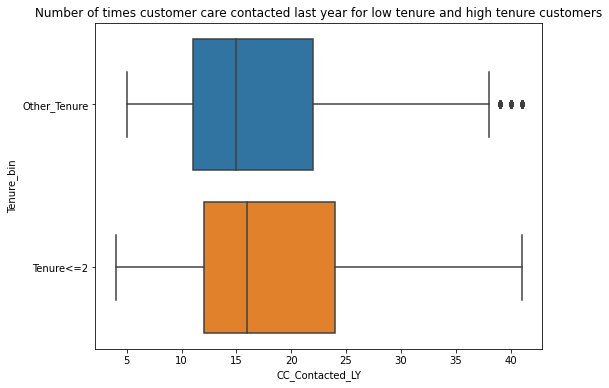

In [200]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_temp["CC_Contacted_LY"], y=df_temp['Tenure_bin'])
plot_title = 'Number of times ' + "customer care contacted last year" + " for low tenure and high tenure customers"
plt.title(plot_title)
plt.show();

Complain_LY       0.0       1.0
Churn                          
0            0.765592  0.234408
1            0.464135  0.535865


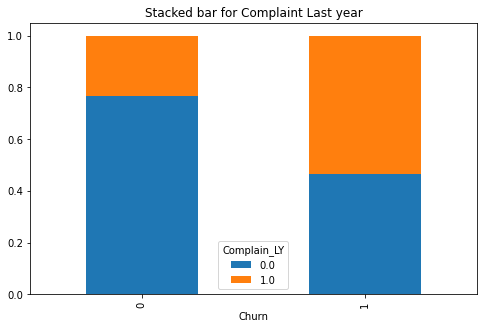

In [201]:
### How Complaint last year impacts customer churn


tab = pd.crosstab(df_temp['Churn'],df_temp['Complain_LY'],normalize='index')
print(tab)
    #plt.figure(figsize=(12,6))
tab.plot(kind='bar', stacked = True, figsize=(8,5))
plot_title = "Stacked bar for " + "Complaint Last year"
plt.title(plot_title)
plt.show();

In [205]:
Churn_count = df_temp[df_temp['Churn']==0]['Churn'].count()
Active_count = df_temp[df_temp['Churn']==1]['Churn'].count()

In [206]:
Churn_count, Active_count

(9364, 1896)

In [207]:
Churn_complaint = df_temp[(df_temp['Churn']==0) & (df_temp['Complain_LY']==1)]['Churn'].count()
Active_complaint = df_temp[(df_temp['Churn']==1) & (df_temp['Complain_LY']==1)]['Churn'].count()

In [208]:
Churn_complaint, Active_complaint

(2195, 1016)

In [210]:
tab = pd.crosstab(df_temp['Churn'],df_temp['Complain_LY'],normalize='index')
print(tab)

Complain_LY       0.0       1.0
Churn                          
0            0.765592  0.234408
1            0.464135  0.535865


Text(0.5, 1.0, '%Churn for customers with and without complaint')

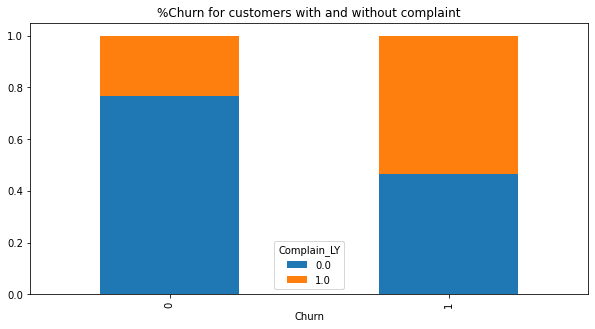

In [211]:
tab.plot(kind='bar', stacked = True, figsize=(10,5))
plt.title("%Churn for customers with and without complaint")

#### Revenue per month

In [212]:
tab = pd.crosstab(df_temp['Rev_Permonth'],df_temp['Churn'],normalize='index', margins=False).round(2)*100
print(tab)

Churn            0     1
Rev_Permonth            
1.0           88.0  12.0
2.0           83.0  17.0
3.0           83.0  17.0
4.0           86.0  14.0
5.0           85.0  15.0
6.0           83.0  17.0
7.0           80.0  20.0
8.0           82.0  18.0
9.0           83.0  17.0
10.0          82.0  18.0
11.0          78.0  22.0
12.0          77.0  23.0
13.0          79.0  21.0


In [213]:
df_revenue_pm = pd.DataFrame(tab.astype('int64'), columns=['Active','Churned'])

In [214]:
df_revenue_pm['Active'] = tab[0]
df_revenue_pm['Churned'] = tab[1]

In [215]:
df_revenue_pm

,Active,Churned
Rev_Permonth,,
1.0,88.0,12.0
2.0,83.0,17.0
3.0,83.0,17.0
4.0,86.0,14.0
5.0,85.0,15.0
6.0,83.0,17.0
7.0,80.0,20.0
8.0,82.0,18.0
9.0,83.0,17.0


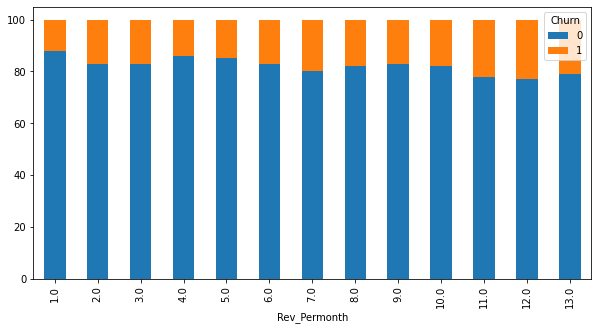

In [216]:
tab.plot(kind='bar', stacked = True, figsize=(10,5))

In [217]:
df_temp['Rev_low_high'] = np.where(df_temp['Rev_Permonth'] <= 6 , 'Low Revenue', 'High Revenue')

Churn                0         1
Rev_low_high                    
High Revenue  0.807214  0.192786
Low Revenue   0.841728  0.158272


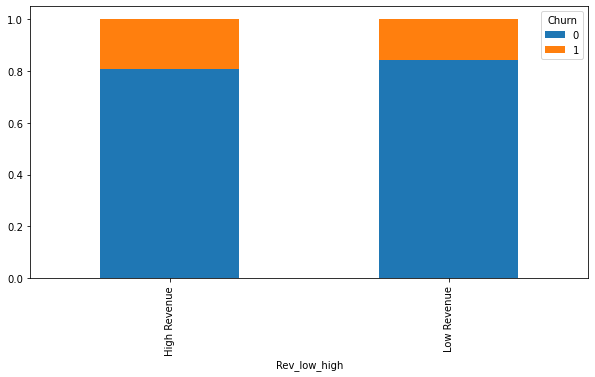

In [218]:
tab_revenue = pd.crosstab(df_temp['Rev_low_high'],df_temp['Churn'],normalize='index')
print(tab_revenue)
tab_revenue.plot(kind='bar', stacked = True, figsize=(10,5))

Rev_low_high  High Revenue  Low Revenue
Churn                                  
0                 0.284387     0.715613
1                 0.335443     0.664557


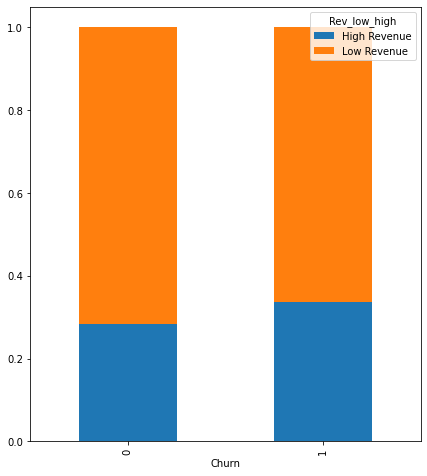

In [219]:
tab_revenue2 = pd.crosstab(df_temp['Churn'],df_temp['Rev_low_high'],normalize='index') #, margins=True)
print(tab_revenue2)
tab_revenue2.plot(kind='bar', stacked = True, figsize=(7,8));

##### Conclusion

###### Immediate action:

###### Long term actions:

### The End of Project notes-1